In [2]:

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
from random import seed


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [3]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
columns_to_drop = ['id', 'Unnamed: 32']
for column in columns_to_drop:
    if column in data.columns:
        data.drop(column, axis=1, inplace=True)

data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [15]:
print("Dataset size:",data.shape)

Dataset size: (569, 31)


In [16]:
data.isnull().values.any()

False

In [17]:
data_copied = data.copy()
data_copied['diagnosis'] = data_copied['diagnosis'].replace(("M"),1)
data_copied['diagnosis'] = data_copied['diagnosis'].replace(("B"),0)

/tmp/ipykernel_34/1880711585.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copied['diagnosis'] = data_copied['diagnosis'].replace(("B"),0)


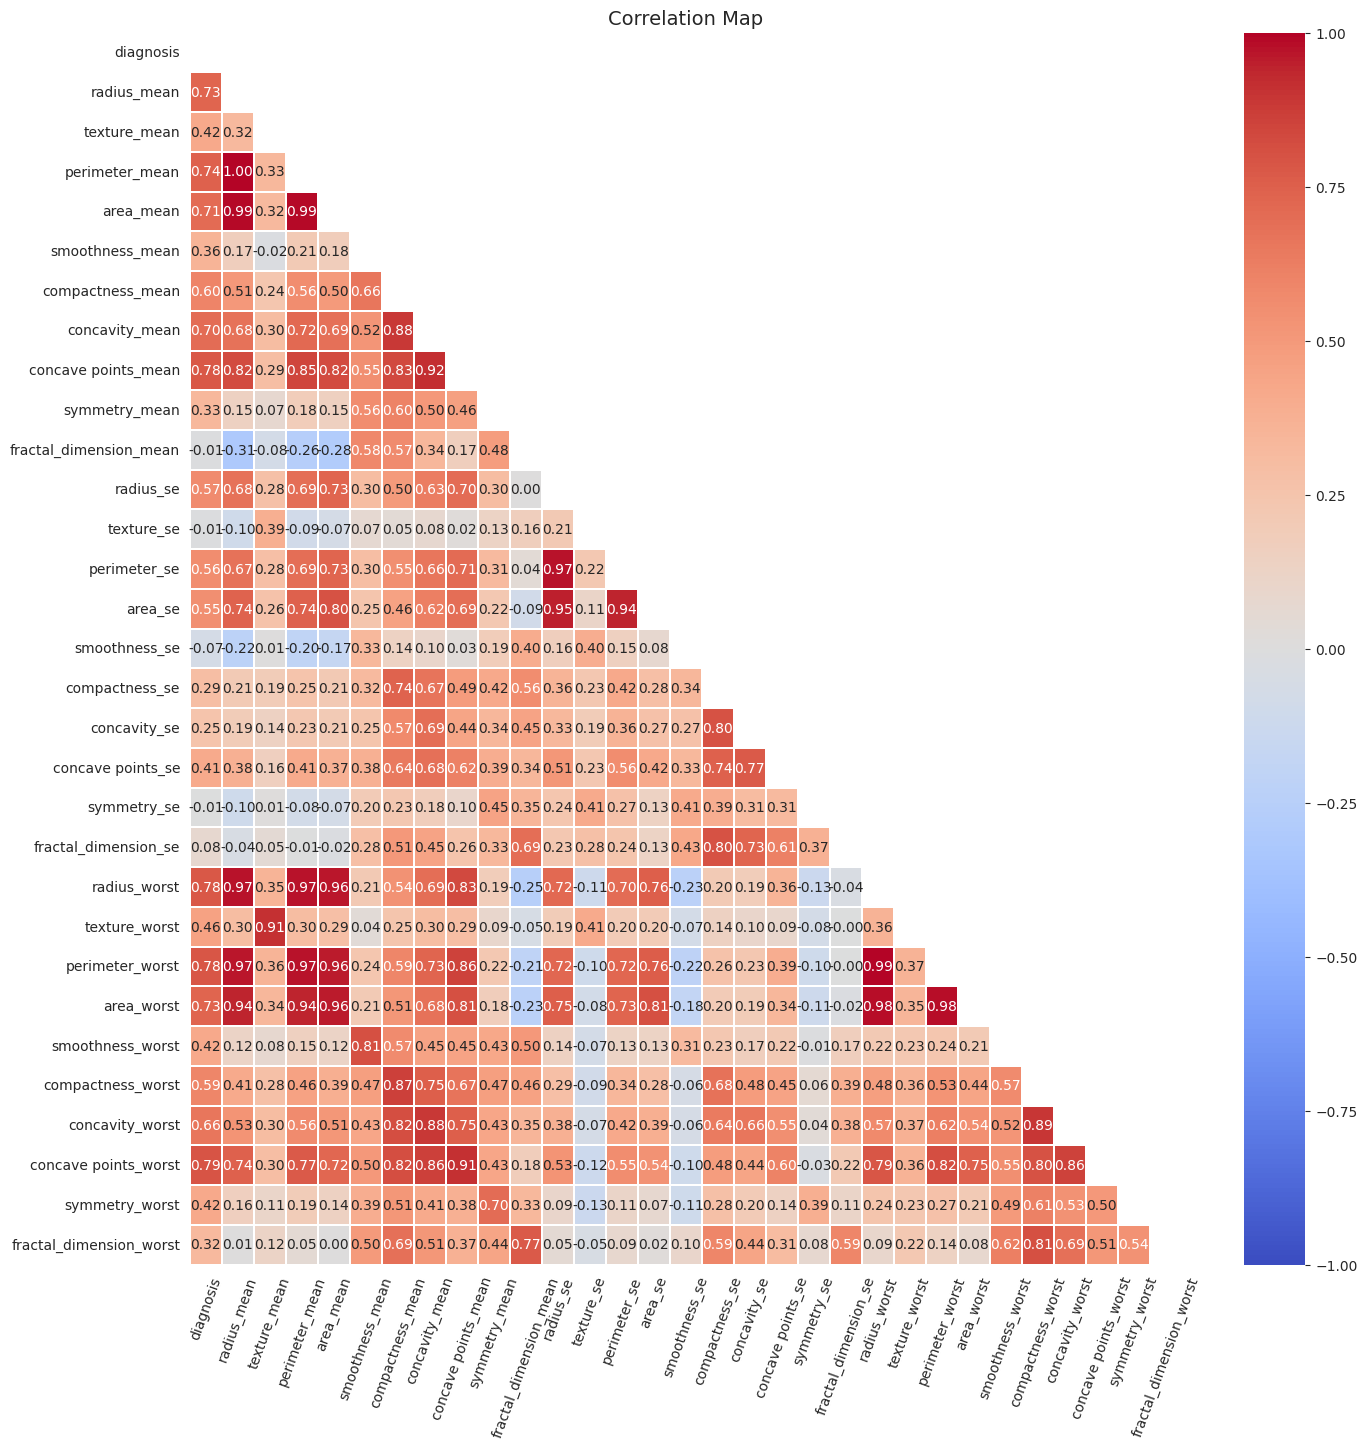

In [18]:
matrix = np.triu(data_copied.corr())
sns.set_style("white")
f,ax=plt.subplots(figsize = (16,16))
sns.heatmap(data_copied.corr(),annot= True,fmt = ".2f",ax=ax,
            vmin = -1,
            vmax = 1, mask = matrix,cmap = "coolwarm",
            linewidth = 0.2,linecolor = "white")
plt.xticks(rotation=70)
plt.yticks(rotation=0)
plt.title('Correlation Map', size = 14)
plt.show()

In [19]:
most_correlated_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 
                        'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
for i in range(0, len(most_correlated_features)):
    fig = px.box(data, x="diagnosis", y=most_correlated_features[i], color="diagnosis" ,width=750,height=450)
    fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Text(0, 0.5, 'Quantity')

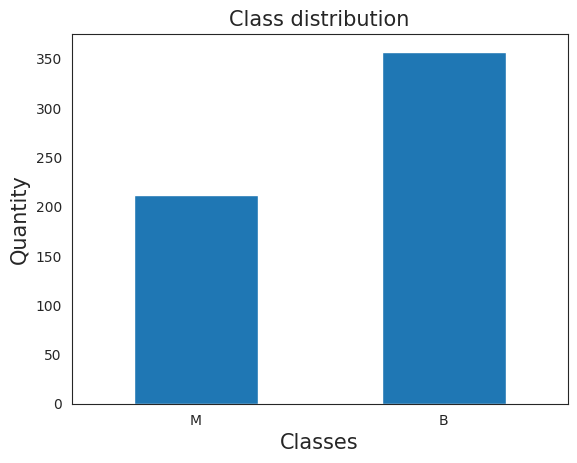

In [20]:
data.diagnosis.value_counts(sort=False).plot(kind='bar')
plt.title('Class distribution', fontsize = 15)
plt.xlabel('Classes', fontsize = 15)
plt.xticks(rotation=360)
plt.ylabel('Quantity', fontsize = 15)

In [25]:
X = data.drop('diagnosis', axis=1)
Y = data ['diagnosis']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 123)
print("Train dataset shape: ",X_train.shape )
print("Test dataset shape: ",X_test.shape )

Train dataset shape:  (455, 30)
Test dataset shape:  (114, 30)


In [27]:
model=tree.DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=123)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print('Training set accuracy: {:.4f}'.format(model.score(X_train, Y_train)*100))
print('Test set accuracy: {:.4f}'.format(model.score(X_test, Y_test)*100))

Training set accuracy: 100.0000
Test set accuracy: 96.4912


In [28]:
def conf_matrix(predictions,Y_test):
    conf_matrix=metrics.confusion_matrix(Y_test,predictions)    
    conf_matrix = pd.DataFrame(confusion_matrix(y_pred=predictions, y_true=Y_test), 
                            index=['B','M'], columns=['B','M'])
    return conf_matrix

In [29]:
conf_matrix(predictions,Y_test)

B   M
B  72   1
M   3  38

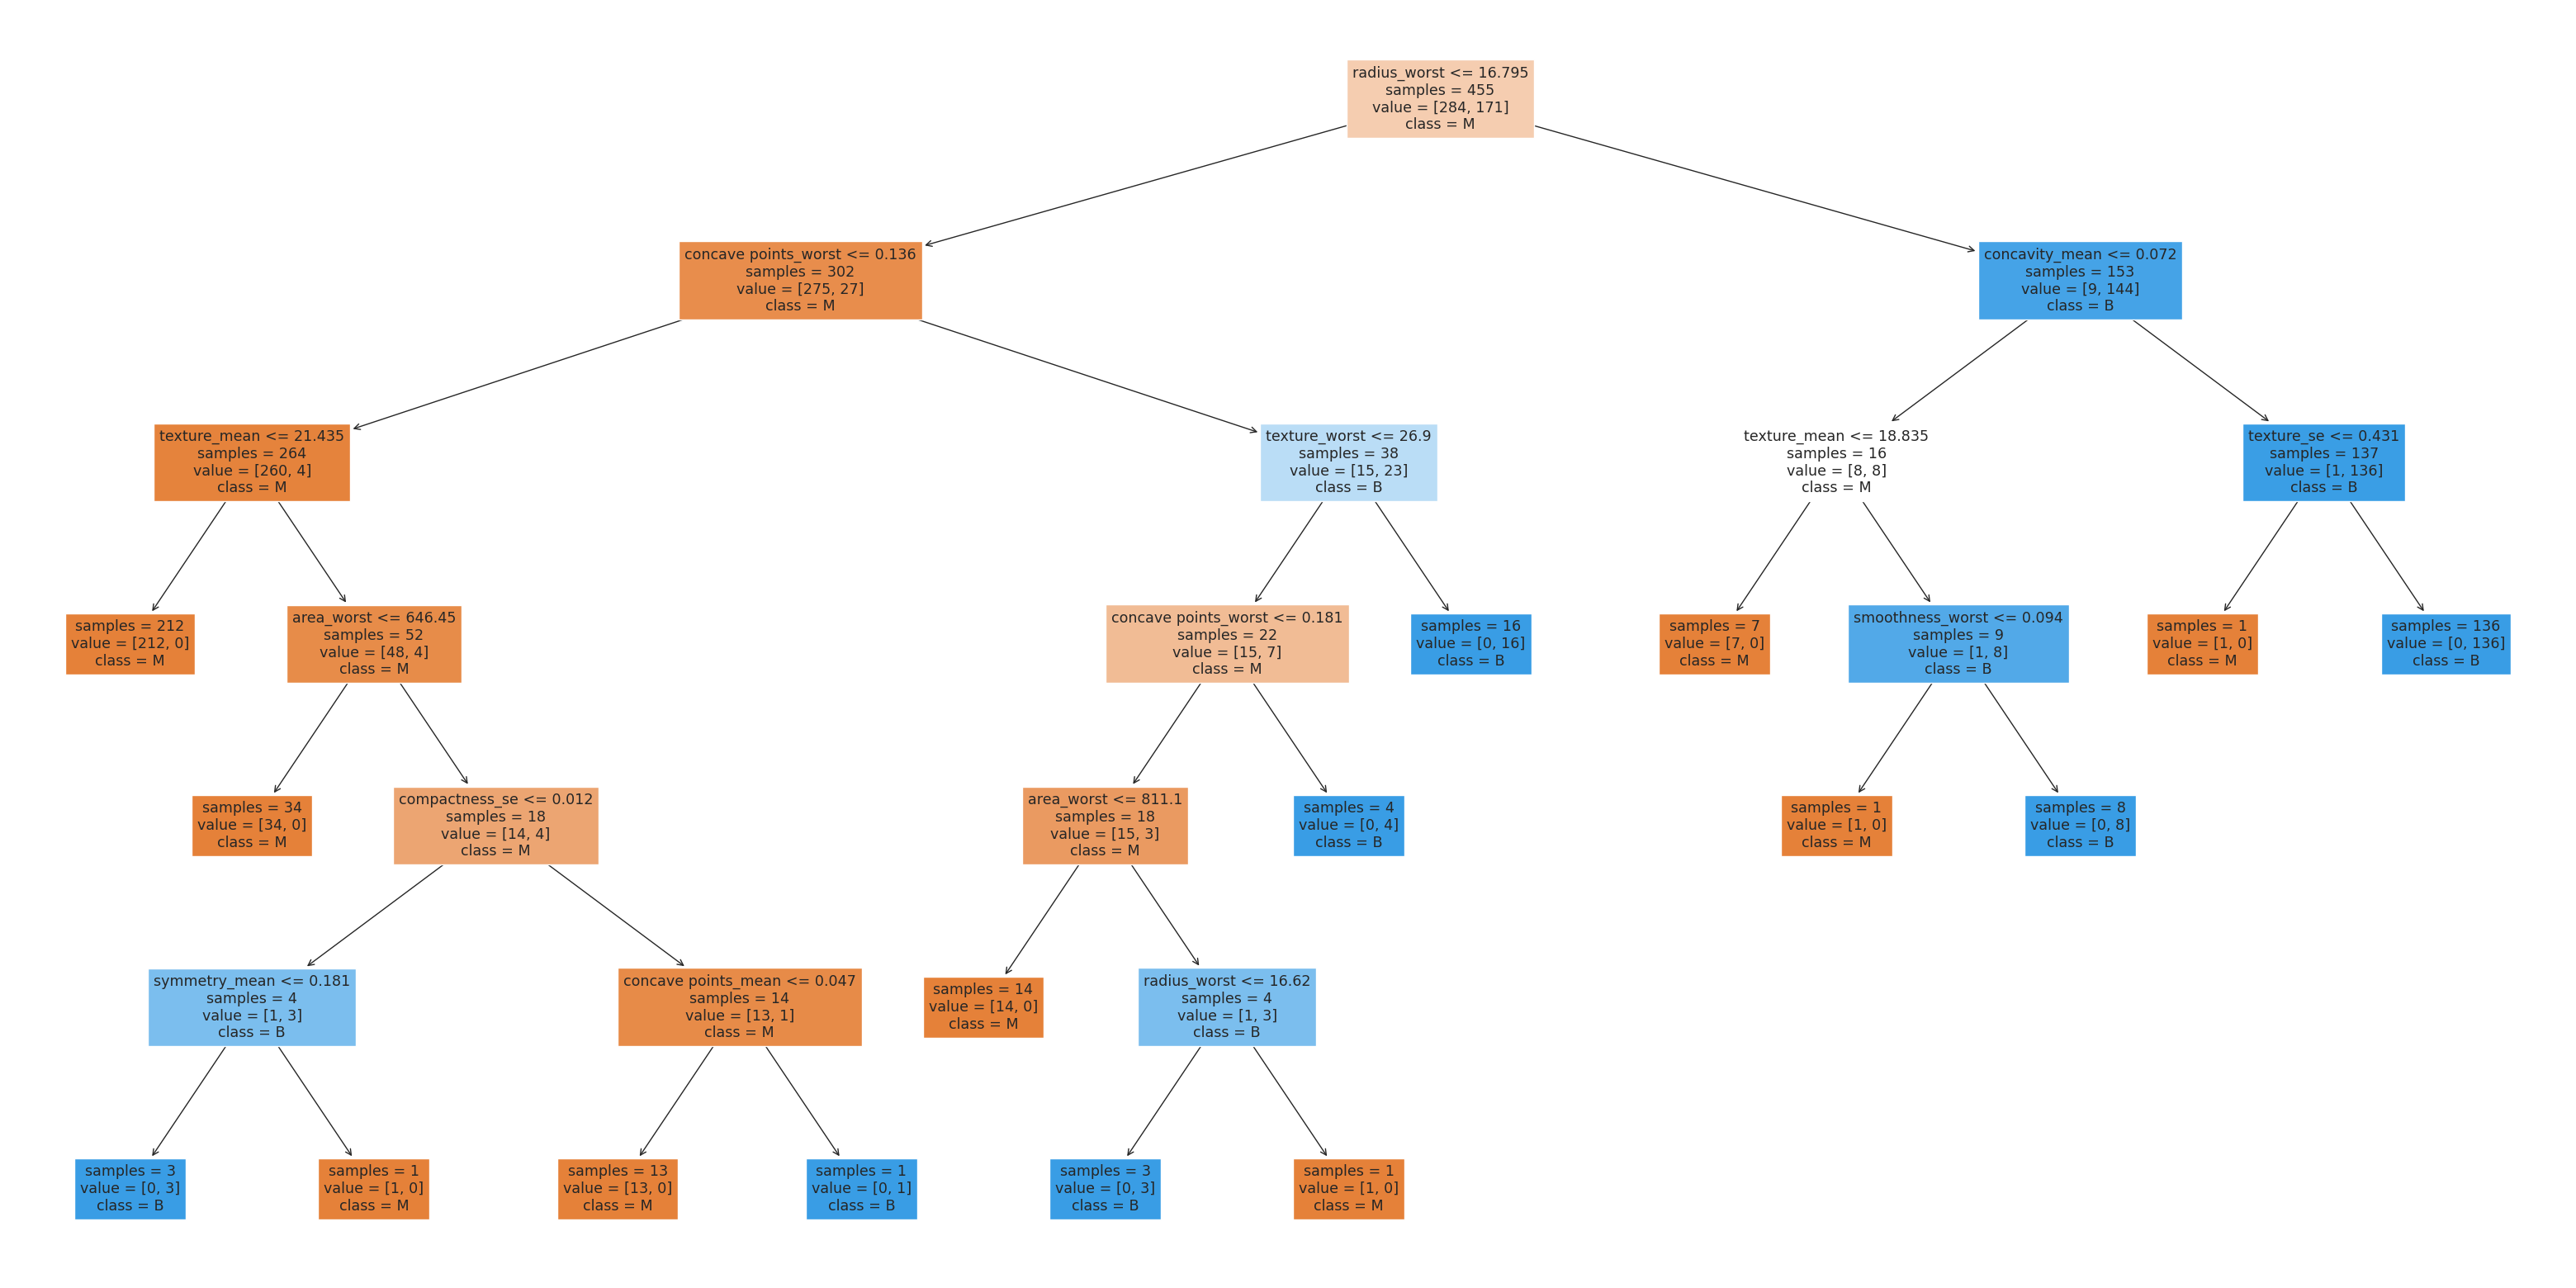

In [32]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(model, 
                   feature_names=list(X.columns.values),  class_names=['M','B'],filled=True, impurity = False)

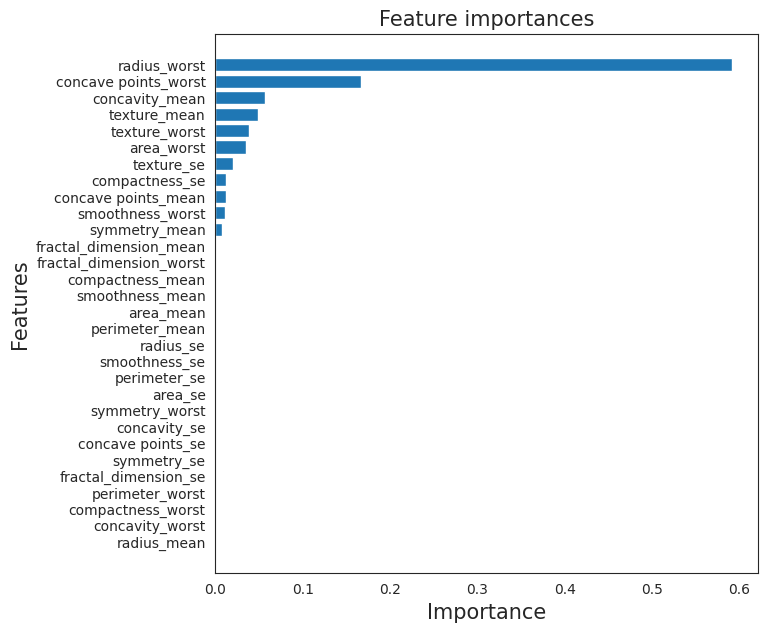

In [33]:
tree_importances = model.feature_importances_
indices = np.argsort(tree_importances)
fig, ax = plt.subplots(figsize = (7,7))
ax.barh(range(len(tree_importances)), tree_importances[indices])
ax.set_yticks(range(len(tree_importances)))
ax.set_title('Feature importances',fontsize=15)
ax.set_xlabel('Importance',fontsize=15)
ax.set_ylabel('Features',fontsize=15)
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [34]:
data_most_important =  data.loc[:,['radius_worst','diagnosis', 'concave points_worst','concavity_mean', 'texture_mean', 'texture_worst',
                                   'area_worst', 'texture_se','compactness_se','concave points_mean','smoothness_worst','symmetry_mean' ]]
data_most_important.head() 

radius_worst diagnosis  concave points_worst  concavity_mean  texture_mean  \
0         25.38         M                0.2654          0.3001         10.38   
1         24.99         M                0.1860          0.0869         17.77   
2         23.57         M                0.2430          0.1974         21.25   
3         14.91         M                0.2575          0.2414         20.38   
4         22.54         M                0.1625          0.1980         14.34   

   texture_worst  area_worst  texture_se  compactness_se  concave points_mean  \
0          17.33      2019.0      0.9053         0.04904              0.14710   
1          23.41      1956.0      0.7339         0.01308              0.07017   
2          25.53      1709.0      0.7869         0.04006              0.12790   
3          26.50       567.7      1.1560         0.07458              0.10520   
4          16.67      1575.0      0.7813         0.02461              0.10430   

   smoothness_worst  symmetry_mean  
0            0.1622         0.2419  
1            0.1238         0.1812  
2            0.1444         0.2069  
3            0.2098         0.2597  
4            0.1374         0.1809

In [35]:
data_most_important.shape

(569, 12)

In [36]:
X_most_important = data_most_important.drop('diagnosis', axis=1)
Y_most_important = data_most_important['diagnosis']

In [37]:
X_train_important, X_test_important, Y_train_important, Y_test_important = train_test_split(X_most_important,Y_most_important, test_size=0.2, random_state = 123)
print("Train dataset shape: ",X_train_important.shape )
print("Test dataset shape: ",X_test_important.shape )

Train dataset shape:  (455, 11)
Test dataset shape:  (114, 11)


In [38]:
seed(48)
model_imp=tree.DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=123)
model_imp.fit(X_train_important,Y_train_important)
predictions_imp=model_imp.predict(X_test_important)
print('Training set accuracy: {:.4f}'.format(model_imp.score(X_train_important, Y_train_important)*100))
print('Test set accuracy: {:.4f}'.format(model_imp.score(X_test_important,Y_test_important)*100))

Training set accuracy: 100.0000
Test set accuracy: 95.6140


In [39]:
conf_matrix(predictions_imp,Y_test_important)

B   M
B  72   1
M   4  37

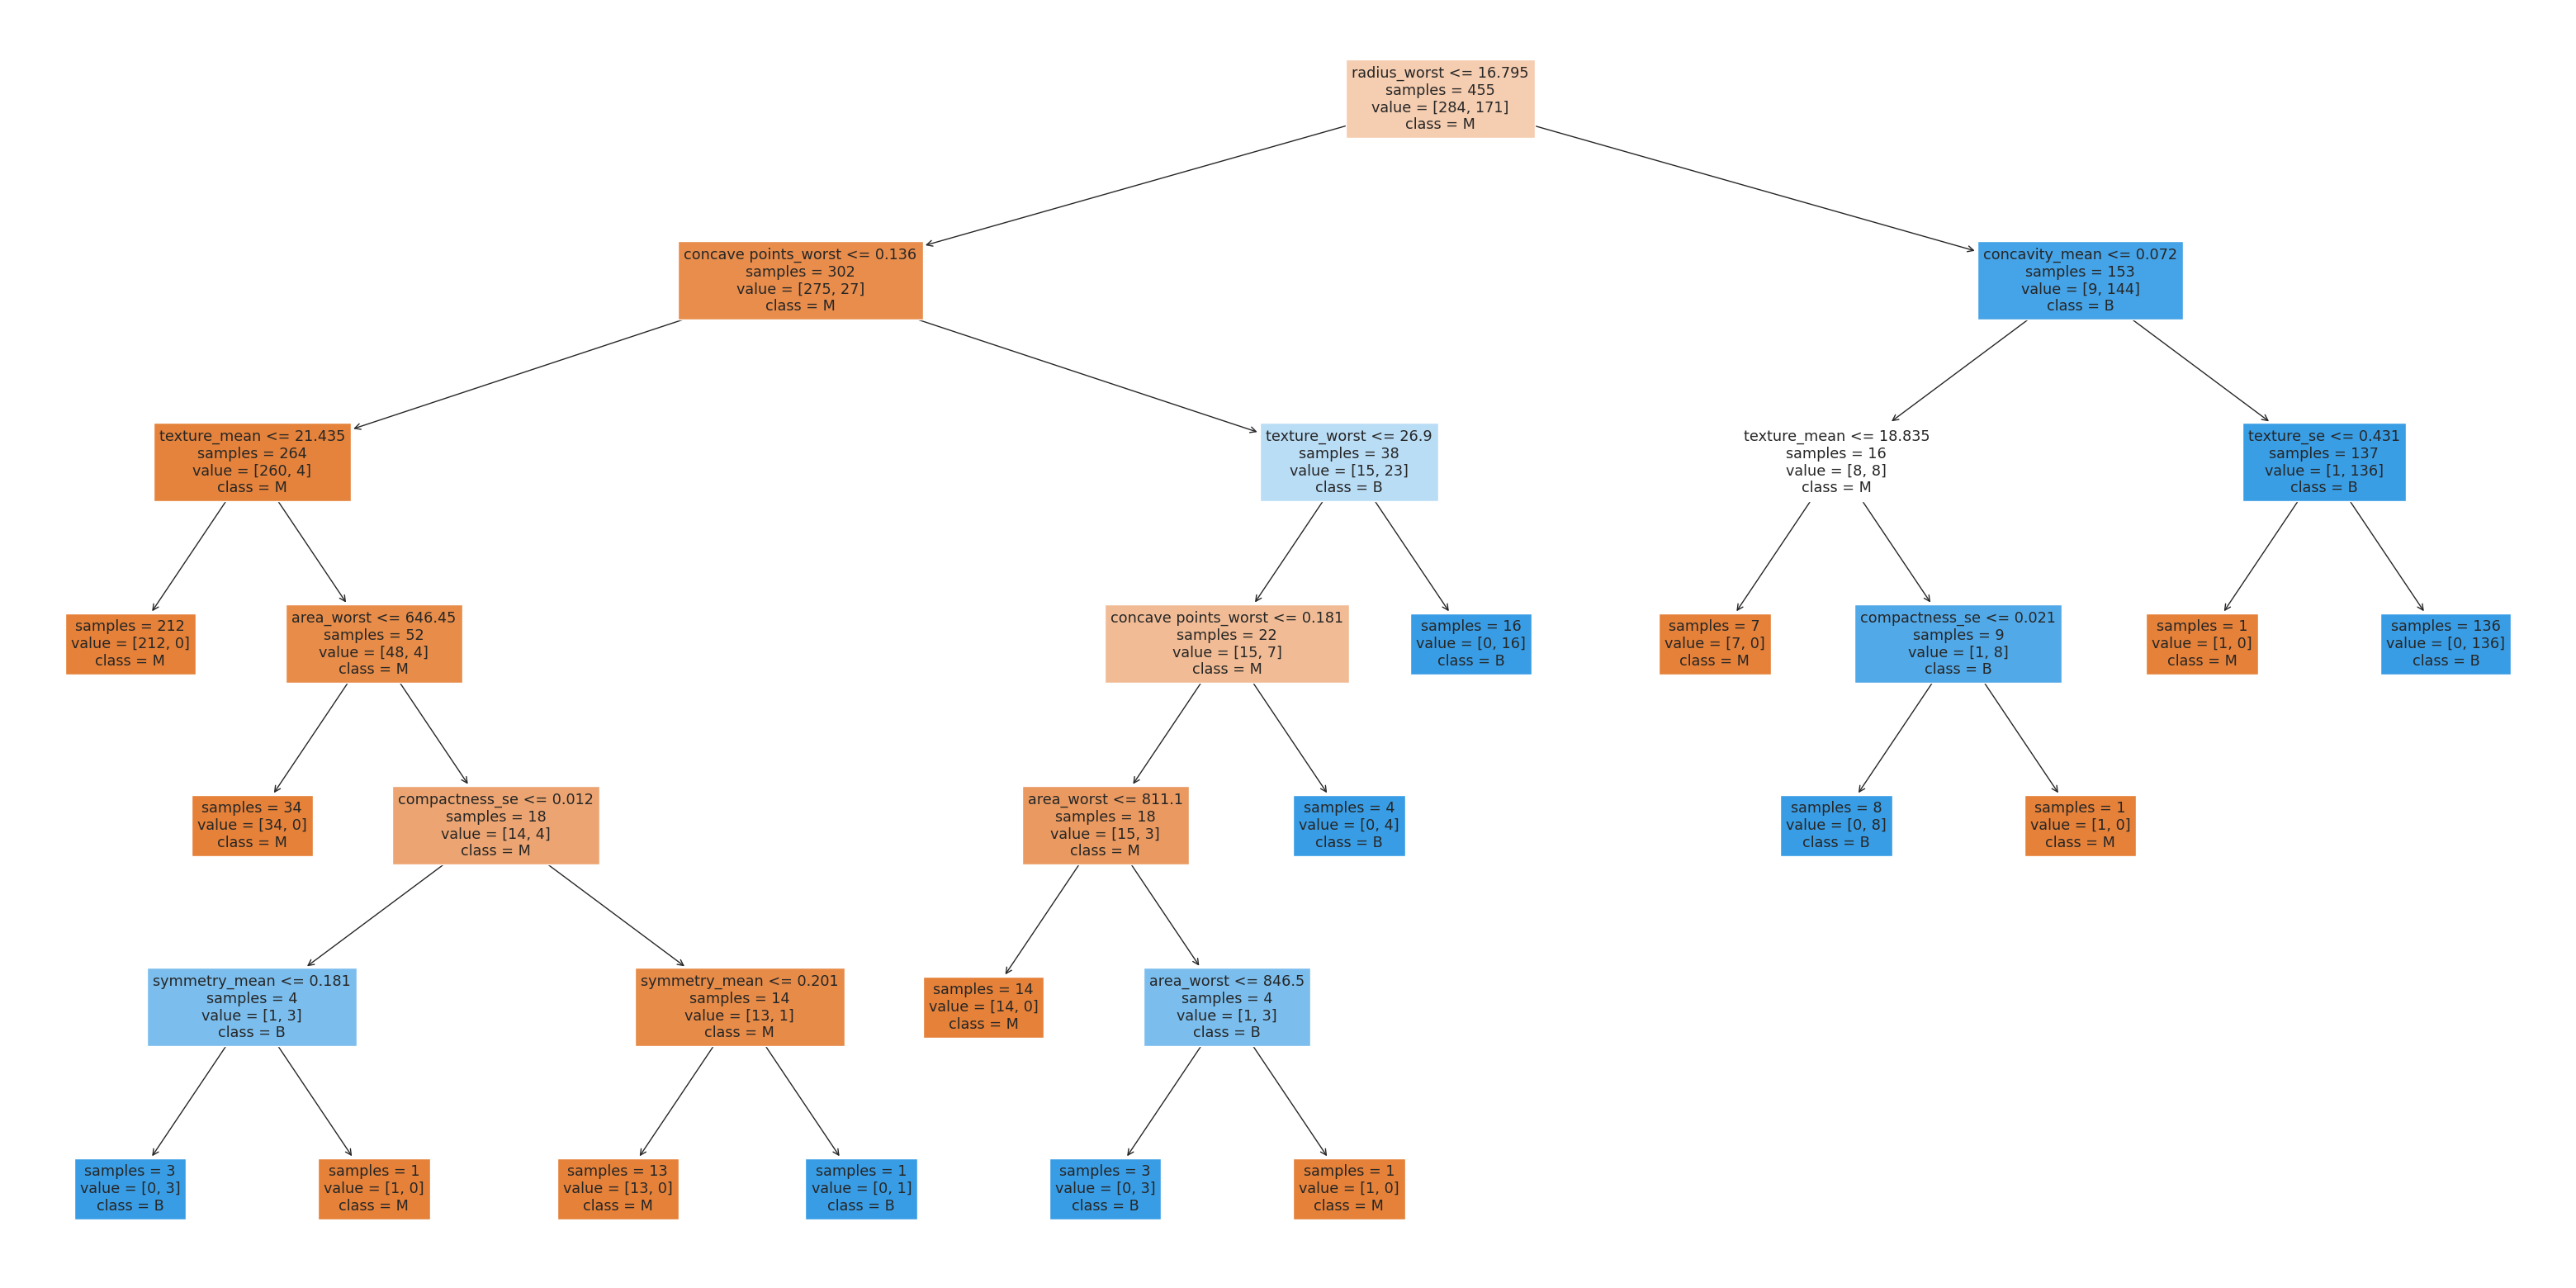

In [40]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(model_imp, feature_names=list(X_train_important.columns.values), class_names=['M','B'],filled=True, impurity = False)

In [42]:

data_most_correlated =  data.loc[:,['radius_mean','diagnosis', 'perimeter_mean', 'area_mean', 'concavity_mean', 
                        'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']]
data_most_correlated.head() 

radius_mean diagnosis  perimeter_mean  area_mean  concavity_mean  \
0        17.99         M          122.80     1001.0          0.3001   
1        20.57         M          132.90     1326.0          0.0869   
2        19.69         M          130.00     1203.0          0.1974   
3        11.42         M           77.58      386.1          0.2414   
4        20.29         M          135.10     1297.0          0.1980   

   concave points_mean  radius_worst  perimeter_worst  area_worst  \
0              0.14710         25.38           184.60      2019.0   
1              0.07017         24.99           158.80      1956.0   
2              0.12790         23.57           152.50      1709.0   
3              0.10520         14.91            98.87       567.7   
4              0.10430         22.54           152.20      1575.0   

   concave points_worst  
0                0.2654  
1                0.1860  
2                0.2430  
3                0.2575  
4                0.1625

In [43]:
X_most_correlated = data_most_correlated.drop('diagnosis', axis=1)
Y_most_correlated = data_most_correlated['diagnosis']

In [44]:
X_train_corr, X_test_corr, Y_train_corr, Y_test_corr = train_test_split(X_most_correlated,Y_most_correlated, test_size=0.2, random_state = 123)
print("Train dataset shape: ",X_train_corr.shape )
print("Test dataset shape: ",X_test_corr.shape )

Train dataset shape:  (455, 9)
Test dataset shape:  (114, 9)


In [45]:
seed(48)
model_corr=tree.DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=123)
model_corr.fit(X_train_corr,Y_train_corr)
predictions_corr=model_corr.predict(X_test_corr)
print('Training set accuracy: {:.4f}'.format(model_corr.score(X_train_corr, Y_train_corr)*100))
print('Test set accuracy: {:.4f}'.format(model_corr.score(X_test_corr, Y_test_corr)*100))

Training set accuracy: 100.0000
Test set accuracy: 94.7368


In [46]:
conf_matrix(predictions_corr,Y_test)

B   M
B  69   4
M   2  39

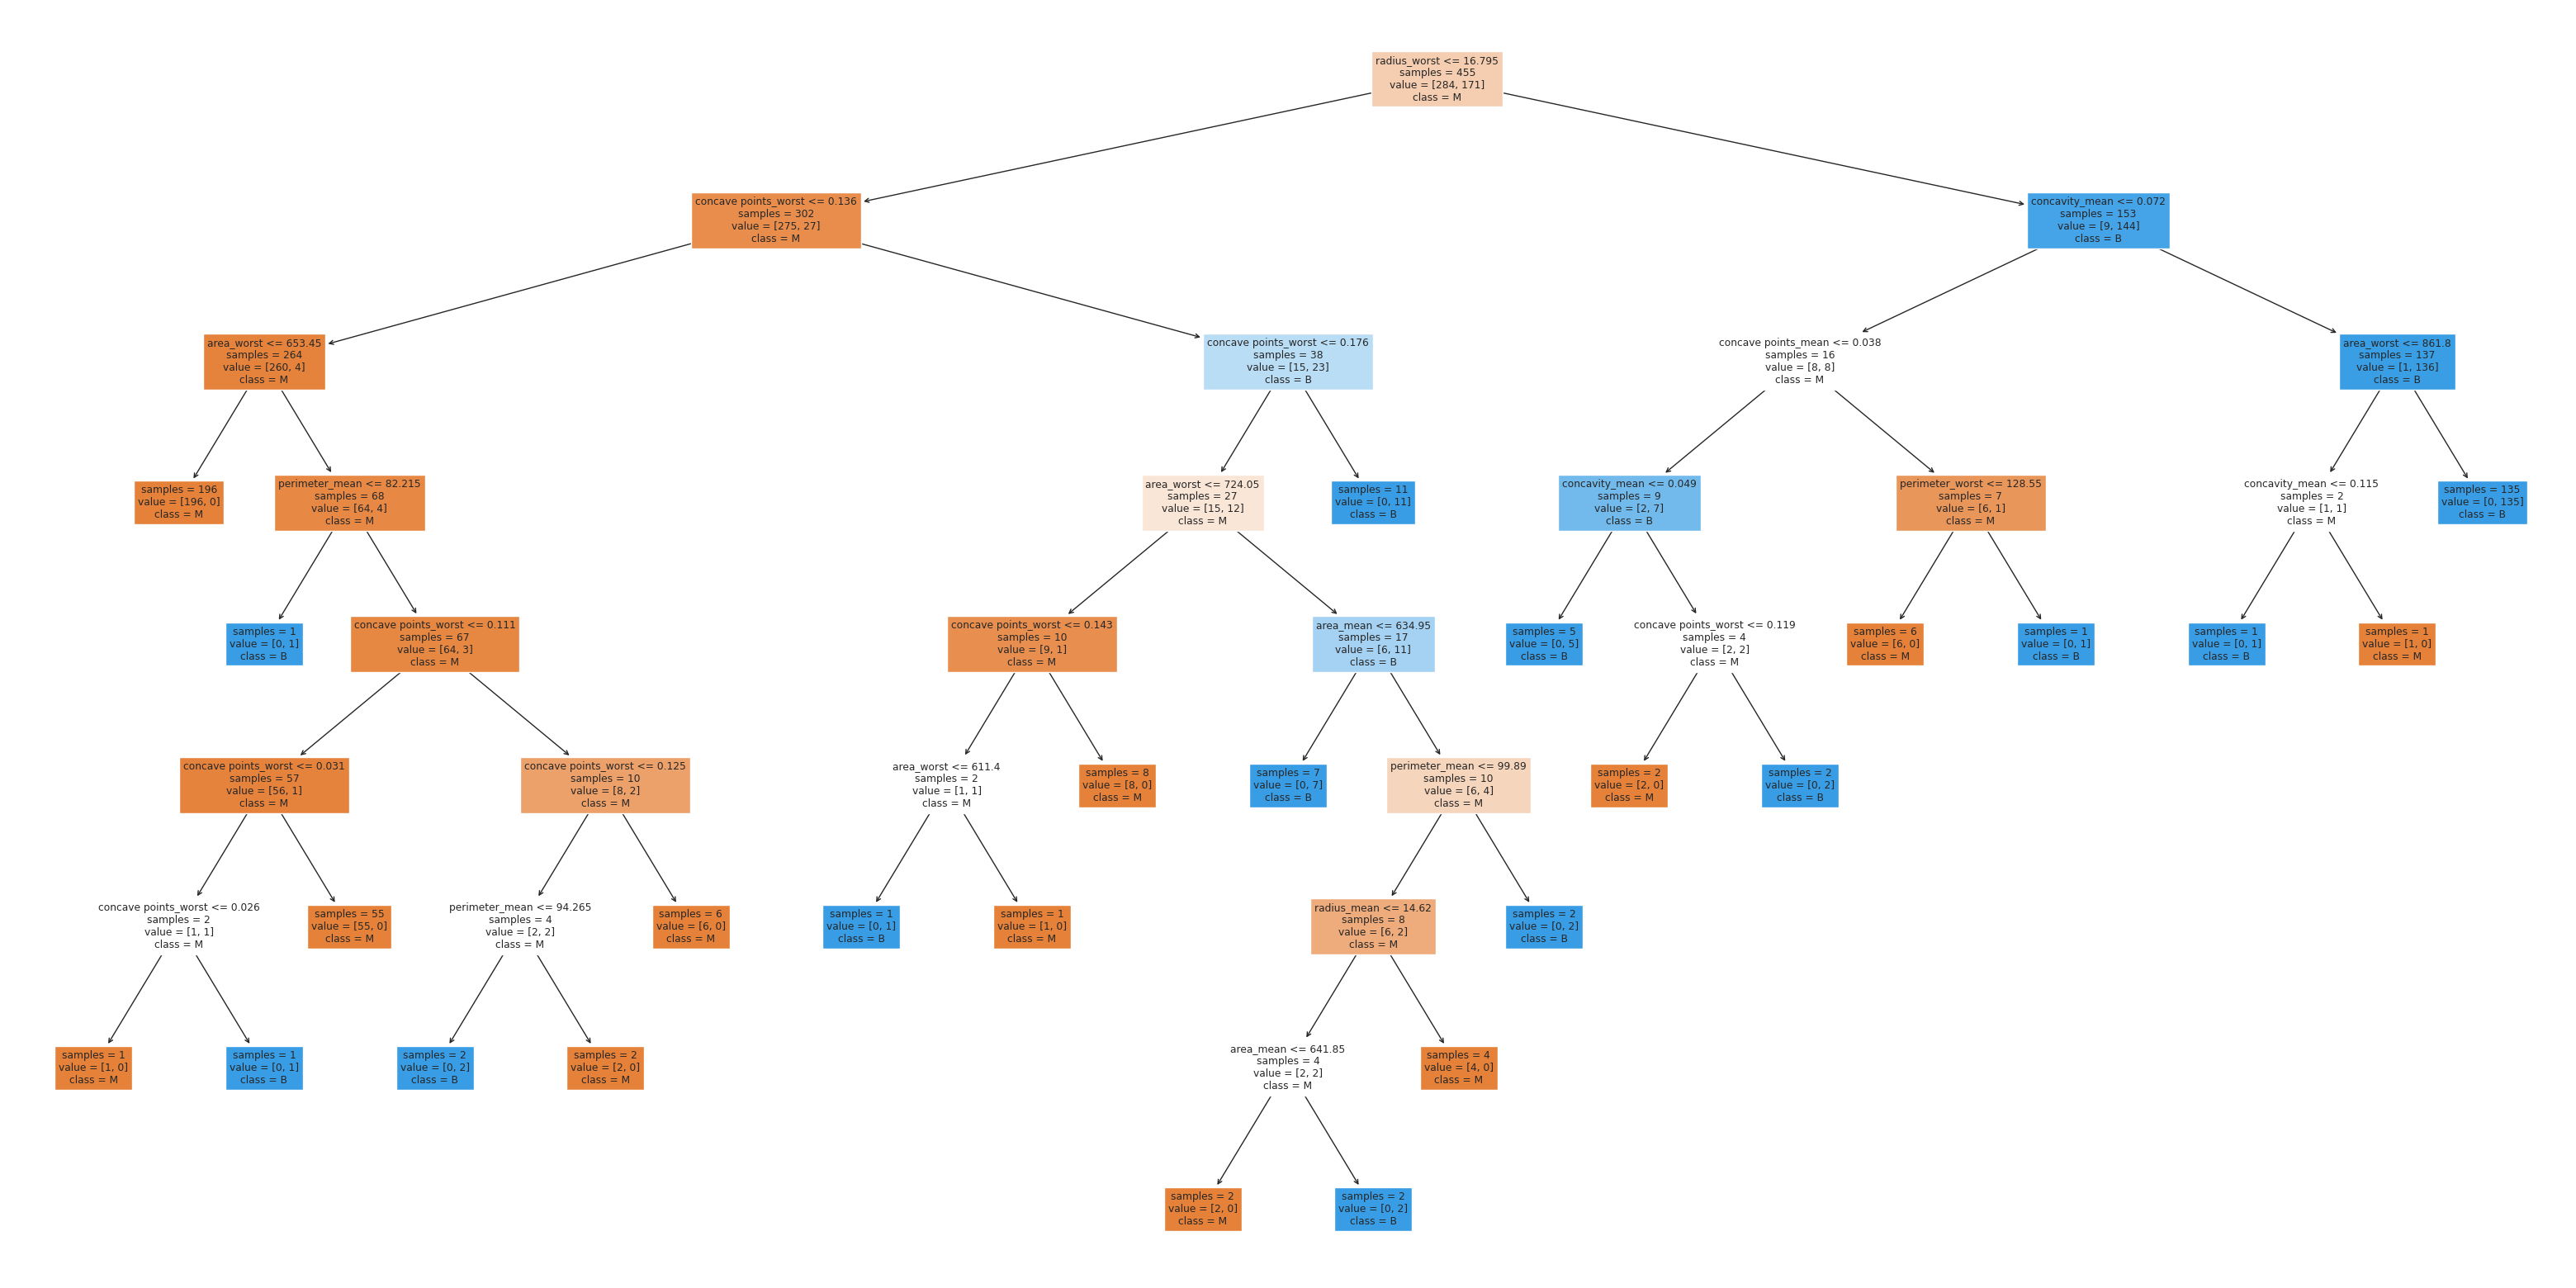

In [47]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(model_corr, feature_names=list(X_most_correlated.columns.values), class_names=['M','B'],
                   filled=True,impurity = False)

In [48]:
model_gini=tree.DecisionTreeClassifier(criterion='gini', splitter='best',random_state=123)
model_gini.fit(X_train,Y_train)
predictions_gini=model_gini.predict(X_test)
print('Training set accuracy: {:.4f}'.format(model_gini.score(X_train, Y_train)*100))
print('Test set accuracy: {:.4f}'.format(model_gini.score(X_test, Y_test)*100))

Training set accuracy: 100.0000
Test set accuracy: 95.6140


In [49]:
conf_matrix(predictions_gini,Y_test)

B   M
B  71   2
M   3  38

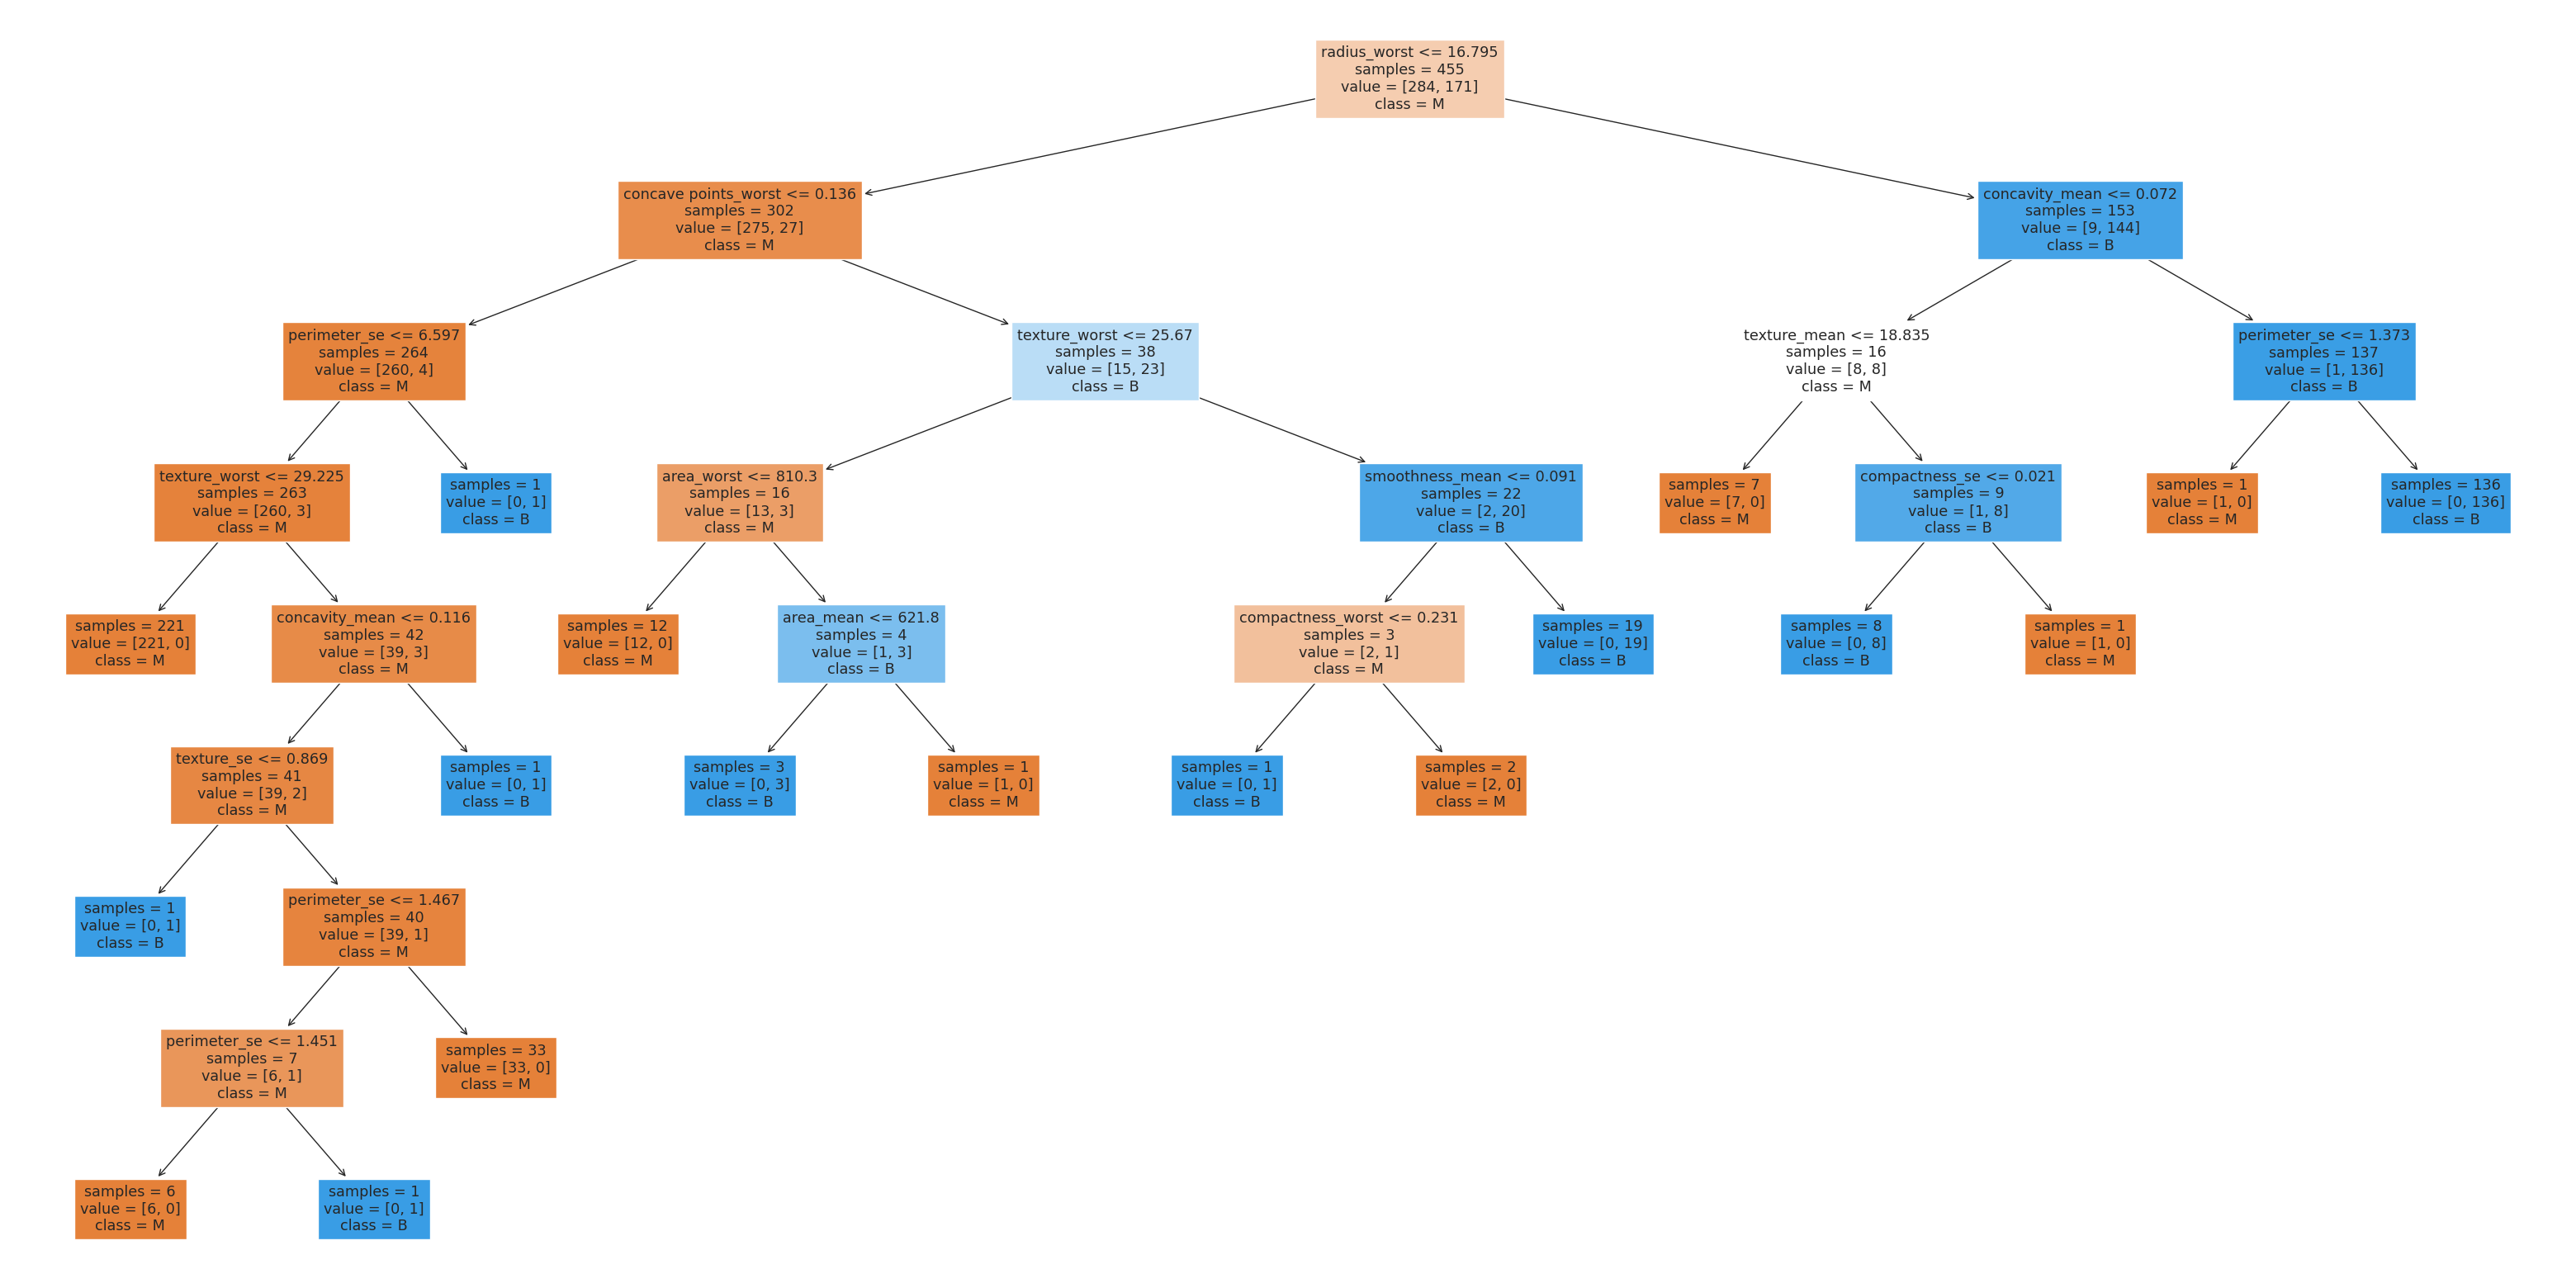

In [50]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(model_gini, feature_names=list(X.columns.values),  class_names=['M','B'],filled=True,impurity = False)

In [51]:
X_most_correlated_gini = data_most_correlated.drop('diagnosis', axis=1)
Y_most_correlated_gini = data_most_correlated['diagnosis']

In [52]:
X_train_gini_corr, X_test_gini_corr, Y_train_gini_corr, Y_test_gini_corr = train_test_split(X_most_correlated_gini,Y_most_correlated_gini, test_size=0.2, random_state = 123)
print("Train dataset shape: ",X_train_gini_corr.shape )
print("Test dataset shape: ",X_test_gini_corr.shape )

Train dataset shape:  (455, 9)
Test dataset shape:  (114, 9)


In [53]:
seed(48)
model_corr_gini=tree.DecisionTreeClassifier(criterion='gini', splitter='best',random_state=123)
model_corr_gini.fit(X_train_gini_corr,Y_train_gini_corr)
predictions_corr_gini=model_corr_gini.predict(X_test_gini_corr)
print('Training set accuracy: {:.4f}'.format(model_corr_gini.score(X_train_gini_corr, Y_train_gini_corr)*100))
print('Test set accuracy: {:.4f}'.format(model_corr_gini.score(X_test_gini_corr, Y_test_gini_corr)*100))

Training set accuracy: 100.0000
Test set accuracy: 92.9825


In [54]:
conf_matrix(predictions_corr_gini,Y_test_corr)

B   M
B  69   4
M   4  37

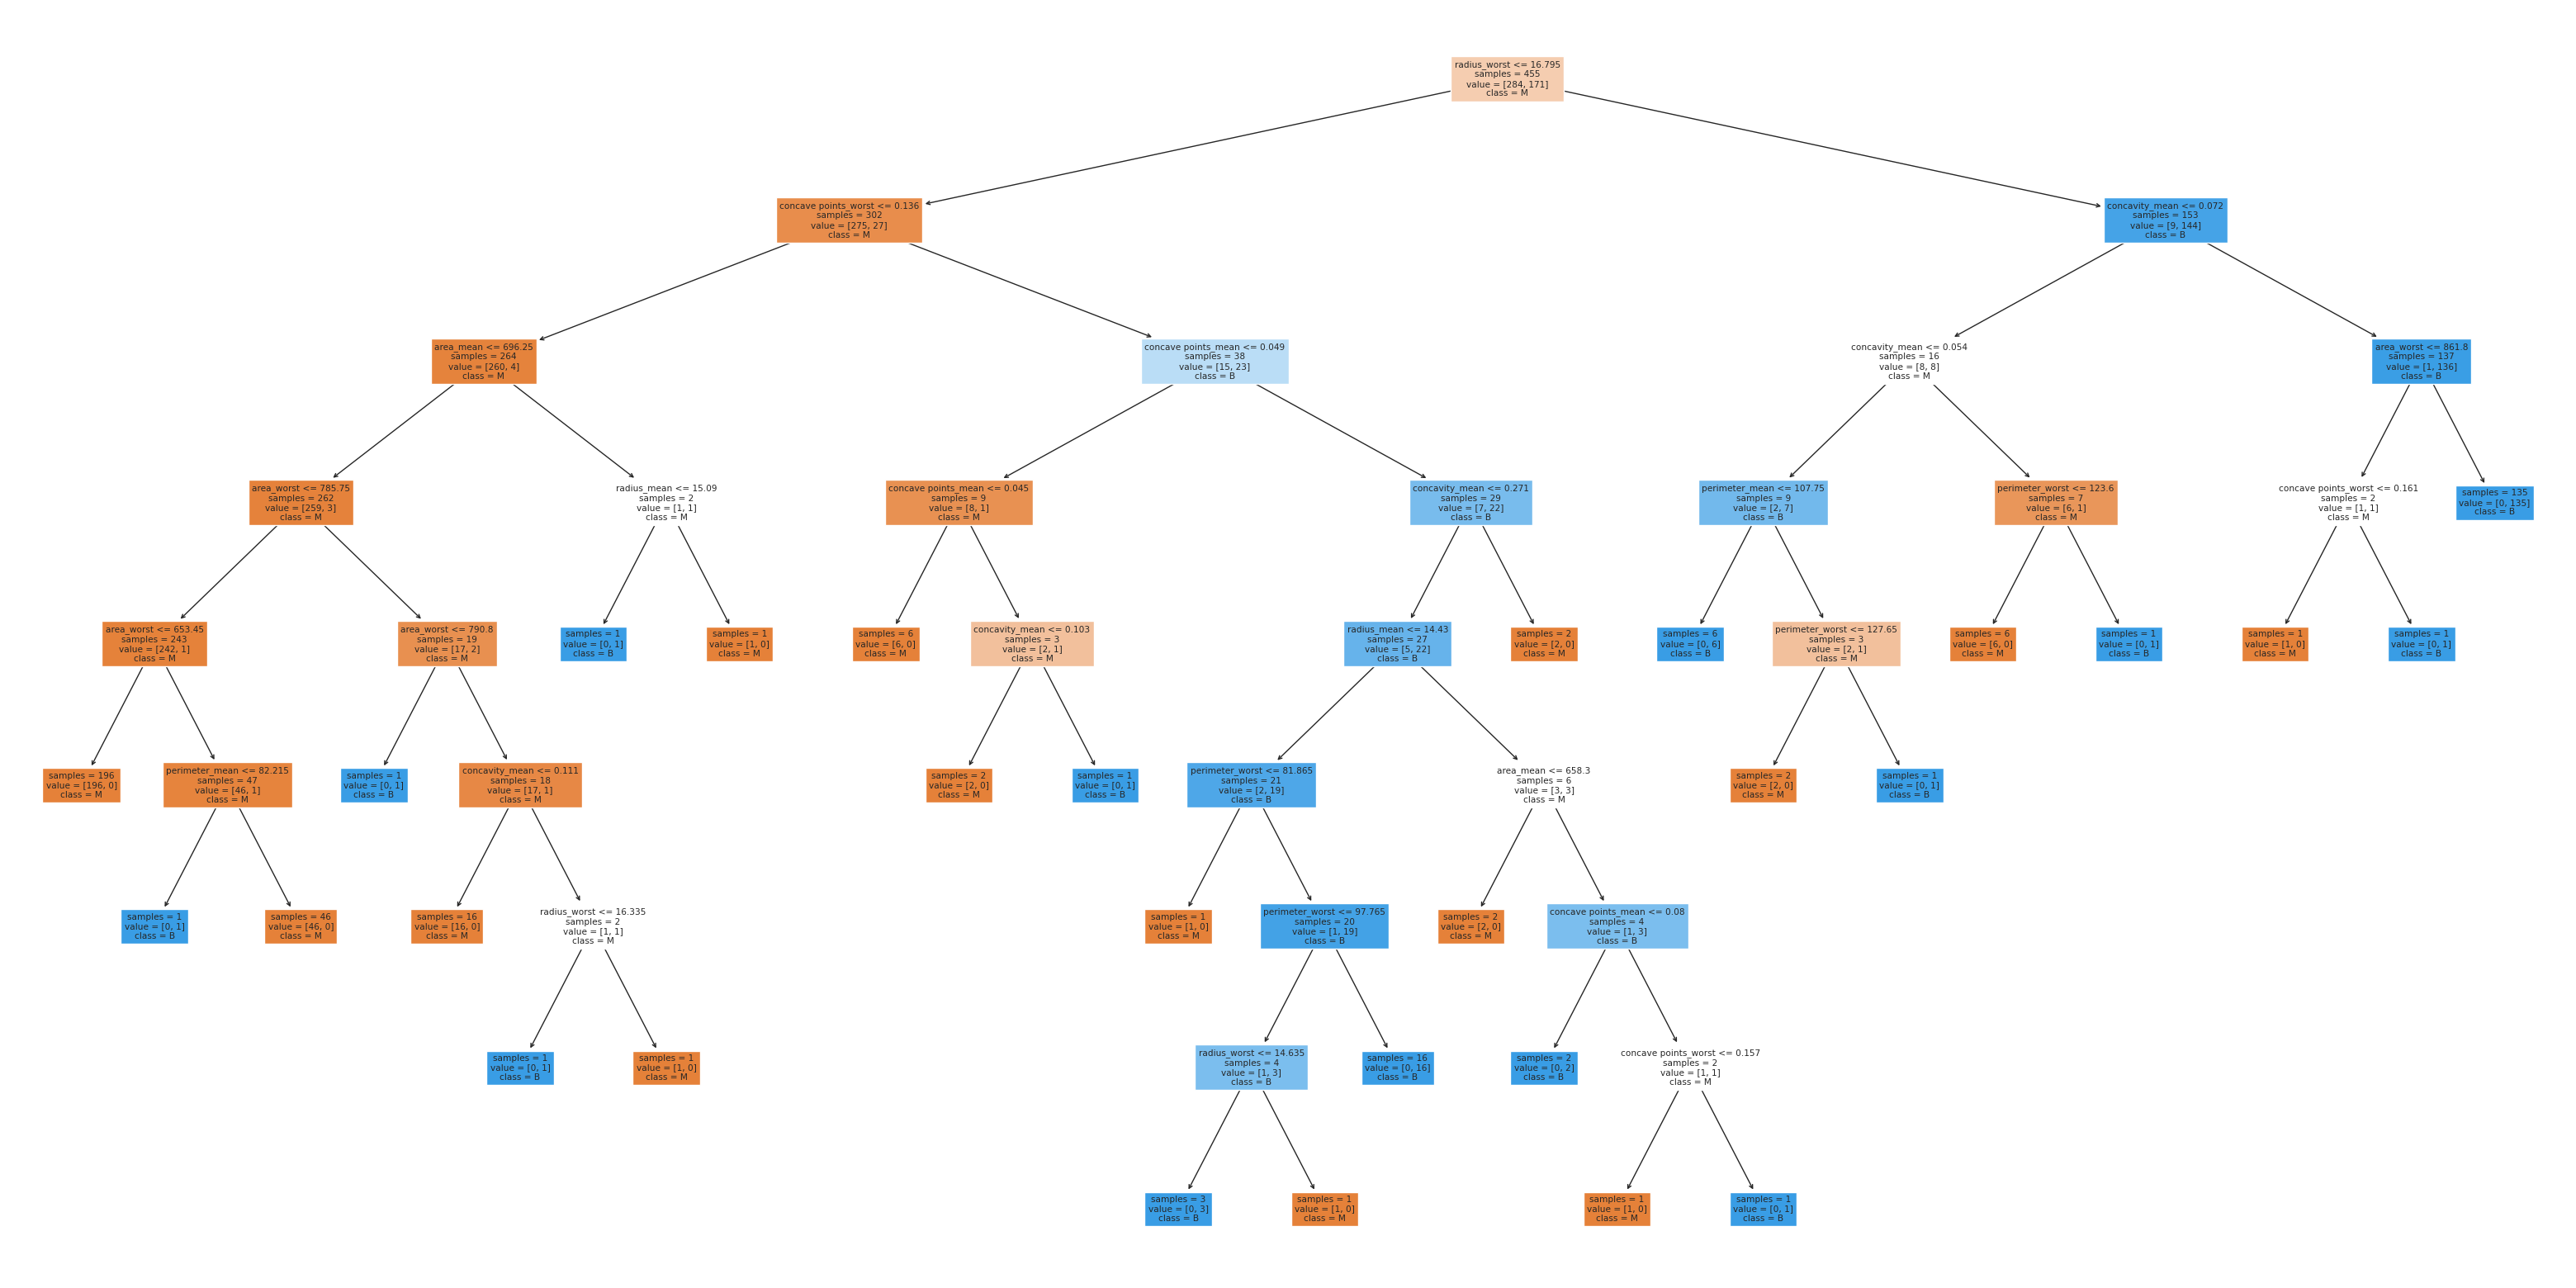

In [55]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(model_corr_gini, feature_names=list(X_most_correlated.columns.values),  class_names=['M','B'], filled=True,impurity = False)

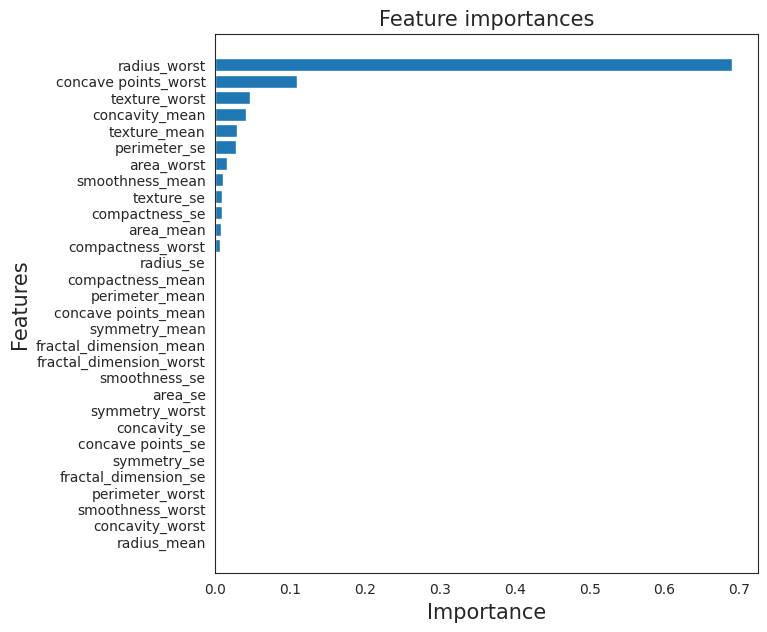

In [56]:
tree_importances = model_gini.feature_importances_
indices = np.argsort(tree_importances)

fig, ax = plt.subplots(figsize = (7,7))
ax.barh(range(len(tree_importances)), tree_importances[indices])
ax.set_yticks(range(len(tree_importances)))
ax.set_title('Feature importances',fontsize=15)
ax.set_xlabel('Importance',fontsize=15)
ax.set_ylabel('Features',fontsize=15)
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [57]:
data_most_important =  data.loc[:,['texture_worst','texture_mean','perimeter_se','texture_se', 'compactness_se', 
                                    'smoothness_mean','diagnosis', 'area_mean', 'concavity_mean', 'compactness_worst',
                                      'radius_worst', 'area_worst', 'concave points_worst']]
data_most_important.head() 

texture_worst  texture_mean  perimeter_se  texture_se  compactness_se  \
0          17.33         10.38         8.589      0.9053         0.04904   
1          23.41         17.77         3.398      0.7339         0.01308   
2          25.53         21.25         4.585      0.7869         0.04006   
3          26.50         20.38         3.445      1.1560         0.07458   
4          16.67         14.34         5.438      0.7813         0.02461   

   smoothness_mean diagnosis  area_mean  concavity_mean  compactness_worst  \
0          0.11840         M     1001.0          0.3001             0.6656   
1          0.08474         M     1326.0          0.0869             0.1866   
2          0.10960         M     1203.0          0.1974             0.4245   
3          0.14250         M      386.1          0.2414             0.8663   
4          0.10030         M     1297.0          0.1980             0.2050   

   radius_worst  area_worst  concave points_worst  
0         25.38      2019.0                0.2654  
1         24.99      1956.0                0.1860  
2         23.57      1709.0                0.2430  
3         14.91       567.7                0.2575  
4         22.54      1575.0                0.1625

In [58]:
X_most_important_gini = data_most_important.drop('diagnosis', axis=1)
Y_most_important_gini = data_most_important['diagnosis']

In [59]:
X_train_important_gini, X_test_important_gini, Y_train_important_gini, Y_test_important_gini = train_test_split(X_most_important_gini,Y_most_important_gini, test_size=0.2, random_state = 123)
print("Train dataset shape: ",X_train_important_gini.shape )
print("Test dataset shape: ",X_test_important_gini.shape )

Train dataset shape:  (455, 12)
Test dataset shape:  (114, 12)


In [60]:
seed(48)
model_imp_gini=tree.DecisionTreeClassifier(criterion='gini', splitter='best',random_state=123)
model_imp_gini.fit(X_train_important_gini,Y_train_important_gini)
predictions_imp_gini=model_imp_gini.predict(X_test_important_gini)
print('Training set accuracy: {:.4f}'.format(model_imp_gini.score(X_train_important_gini, Y_train_important_gini)*100))
print('Test set accuracy: {:.4f}'.format(model_imp_gini.score(X_test_important_gini,Y_test_important_gini)*100))

Training set accuracy: 100.0000
Test set accuracy: 96.4912


In [61]:
conf_matrix(predictions_imp_gini,Y_test_important)

B   M
B  71   2
M   2  39

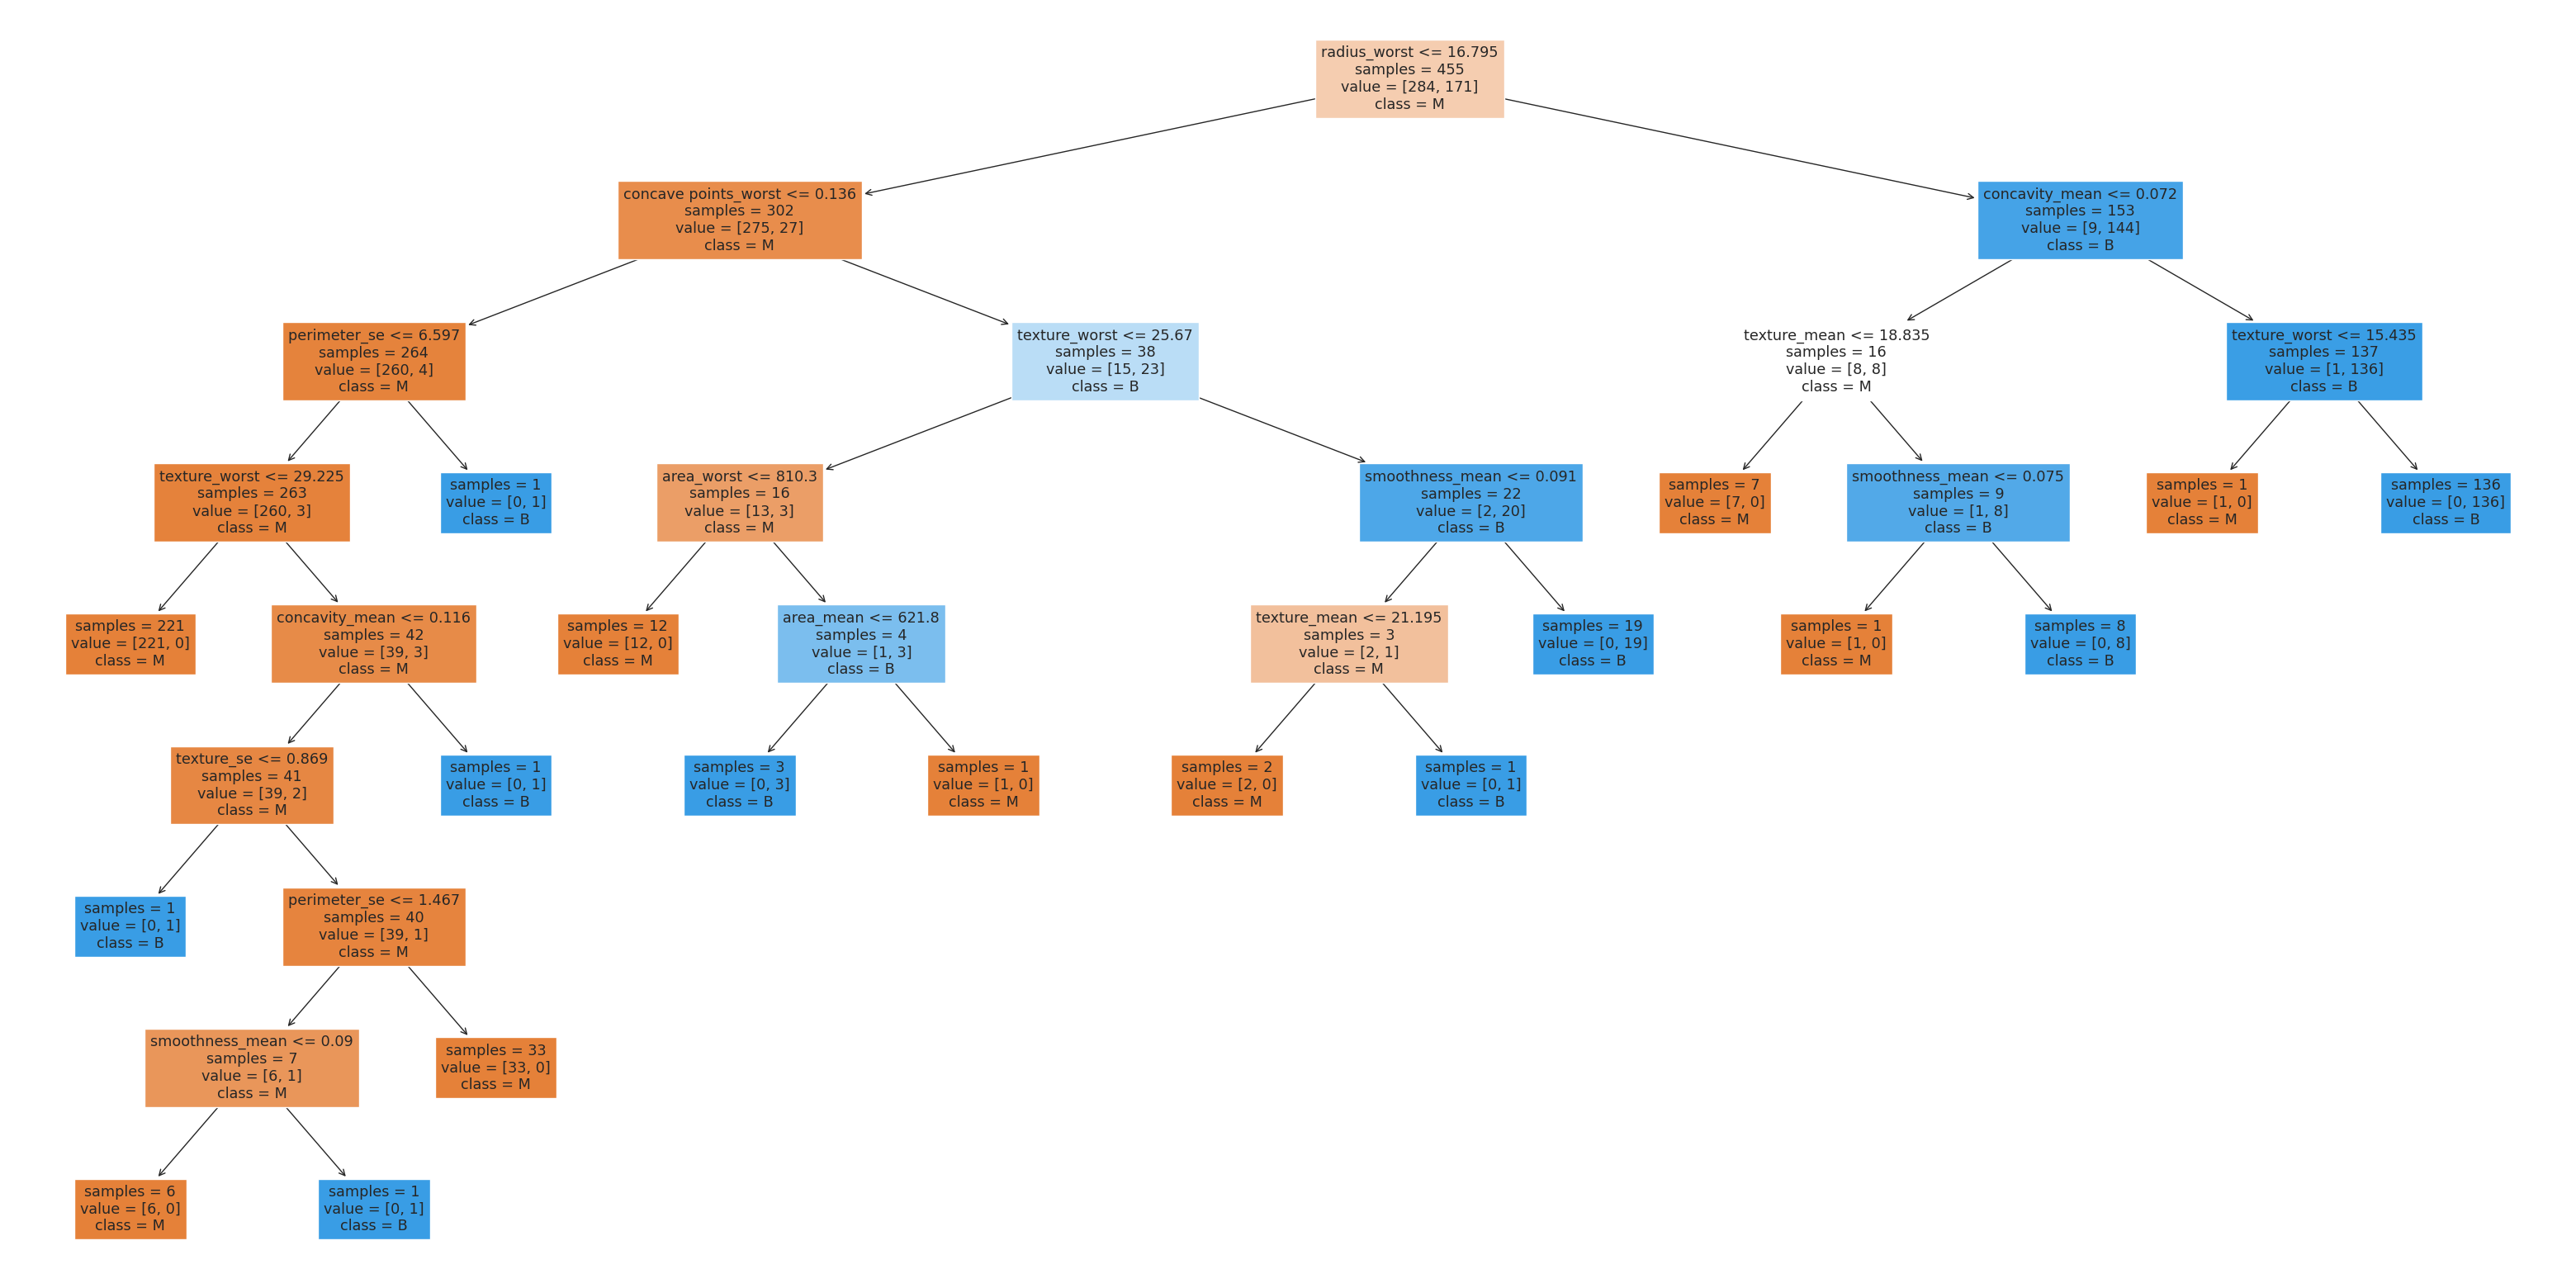

In [62]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(model_imp_gini, feature_names=list(X_most_important_gini.columns.values),  class_names=['M','B'],filled=True,impurity = False)

In [63]:
data_B = data.loc[data['diagnosis'] == 'B']
data_M = data.loc[data['diagnosis'] == 'M']
n = 30
data_M = data_M.iloc[:n]

In [64]:
data_B.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19         B       13.540         14.36           87.46      566.3   
20         B       13.080         15.71           85.63      520.0   
21         B        9.504         12.44           60.34      273.9   
37         B       13.030         18.42           82.61      523.8   
46         B        8.196         16.84           51.71      201.9   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
19          0.09779           0.08129         0.06664             0.047810   
20          0.10750           0.12700         0.04568             0.031100   
21          0.10240           0.06492         0.02956             0.020760   
37          0.08983           0.03766         0.02562             0.029230   
46          0.08600           0.05943         0.01588             0.005917   

    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
19         0.1885  ...        15.110          19.26            99.70   
20         0.1967  ...        14.500          20.49            96.09   
21         0.1815  ...        10.230          15.66            65.13   
37         0.1467  ...        13.300          22.81            84.46   
46         0.1769  ...         8.964          21.96            57.26   

    area_worst  smoothness_worst  compactness_worst  concavity_worst  \
19       711.2           0.14400            0.17730          0.23900   
20       630.5           0.13120            0.27760          0.18900   
21       314.9           0.13240            0.11480          0.08867   
37       545.9           0.09701            0.04619          0.04833   
46       242.2           0.12970            0.13570          0.06880   

    concave points_worst  symmetry_worst  fractal_dimension_worst  
19               0.12880          0.2977                  0.07259  
20               0.07283          0.3184                  0.08183  
21               0.06227          0.2450                  0.07773  
37               0.05013          0.1987                  0.06169  
46               0.02564          0.3105                  0.07409  

[5 rows x 31 columns]

In [65]:
data_B.shape


(357, 31)

In [66]:
data_M.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [67]:
data_imbalanced = pd.concat([data_B,data_M])
data_imbalanced.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19         B       13.540         14.36           87.46      566.3   
20         B       13.080         15.71           85.63      520.0   
21         B        9.504         12.44           60.34      273.9   
37         B       13.030         18.42           82.61      523.8   
46         B        8.196         16.84           51.71      201.9   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
19          0.09779           0.08129         0.06664             0.047810   
20          0.10750           0.12700         0.04568             0.031100   
21          0.10240           0.06492         0.02956             0.020760   
37          0.08983           0.03766         0.02562             0.029230   
46          0.08600           0.05943         0.01588             0.005917   

    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
19         0.1885  ...        15.110          19.26            99.70   
20         0.1967  ...        14.500          20.49            96.09   
21         0.1815  ...        10.230          15.66            65.13   
37         0.1467  ...        13.300          22.81            84.46   
46         0.1769  ...         8.964          21.96            57.26   

    area_worst  smoothness_worst  compactness_worst  concavity_worst  \
19       711.2           0.14400            0.17730          0.23900   
20       630.5           0.13120            0.27760          0.18900   
21       314.9           0.13240            0.11480          0.08867   
37       545.9           0.09701            0.04619          0.04833   
46       242.2           0.12970            0.13570          0.06880   

    concave points_worst  symmetry_worst  fractal_dimension_worst  
19               0.12880          0.2977                  0.07259  
20               0.07283          0.3184                  0.08183  
21               0.06227          0.2450                  0.07773  
37               0.05013          0.1987                  0.06169  
46               0.02564          0.3105                  0.07409  

[5 rows x 31 columns]

Text(0, 0.5, 'Quantity')

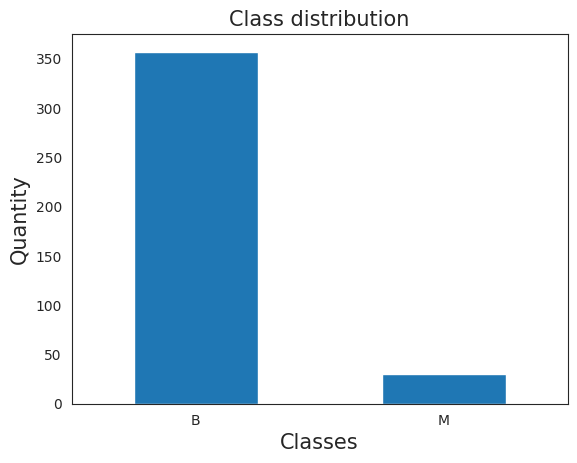

In [68]:
data_imbalanced.diagnosis.value_counts(sort=False).plot(kind='bar')
plt.title('Class distribution', fontsize = 15)
plt.xlabel('Classes', fontsize = 15)
plt.xticks(rotation=360)
plt.ylabel('Quantity', fontsize = 15)

In [69]:
X_imbalanced = data_imbalanced.drop('diagnosis', axis=1)
Y_imbalanced = data_imbalanced['diagnosis']

In [70]:
X_train_imbalanced, X_test_imbalanced, Y_train_imbalanced, Y_test_imbalanced = train_test_split(X_imbalanced,Y_imbalanced, test_size=0.25, random_state = 123)
print("Train dataset shape: ",X_train_imbalanced.shape )
print("Test dataset shape: ",X_test_imbalanced.shape )

Train dataset shape:  (290, 30)
Test dataset shape:  (97, 30)


In [71]:
Y_train_imbalanced.value_counts()

diagnosis
B    268
M     22
Name: count, dtype: int64

In [72]:
Y_test_imbalanced.value_counts()

diagnosis
B    89
M     8
Name: count, dtype: int64

In [73]:
train_ratio = 268/22
test_ratio = 89/8
print("Train ratio:", train_ratio)
print("Test ratio:", test_ratio)


Train ratio: 12.181818181818182
Test ratio: 11.125


In [74]:
model_imbalanced=tree.DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=123)
model_imbalanced.fit(X_train_imbalanced,Y_train_imbalanced)
predictions_imbalanced=model_imbalanced.predict(X_test_imbalanced)
print('Training set accuracy: {:.4f}'.format(model_imbalanced.score(X_train_imbalanced, Y_train_imbalanced)*100))
print('Test set accuracy: {:.4f}'.format(model_imbalanced.score(X_test_imbalanced, Y_test_imbalanced)*100))


Training set accuracy: 100.0000
Test set accuracy: 100.0000


In [75]:
conf_matrix(predictions_imbalanced,Y_test_imbalanced)

B  M
B  89  0
M   0  8

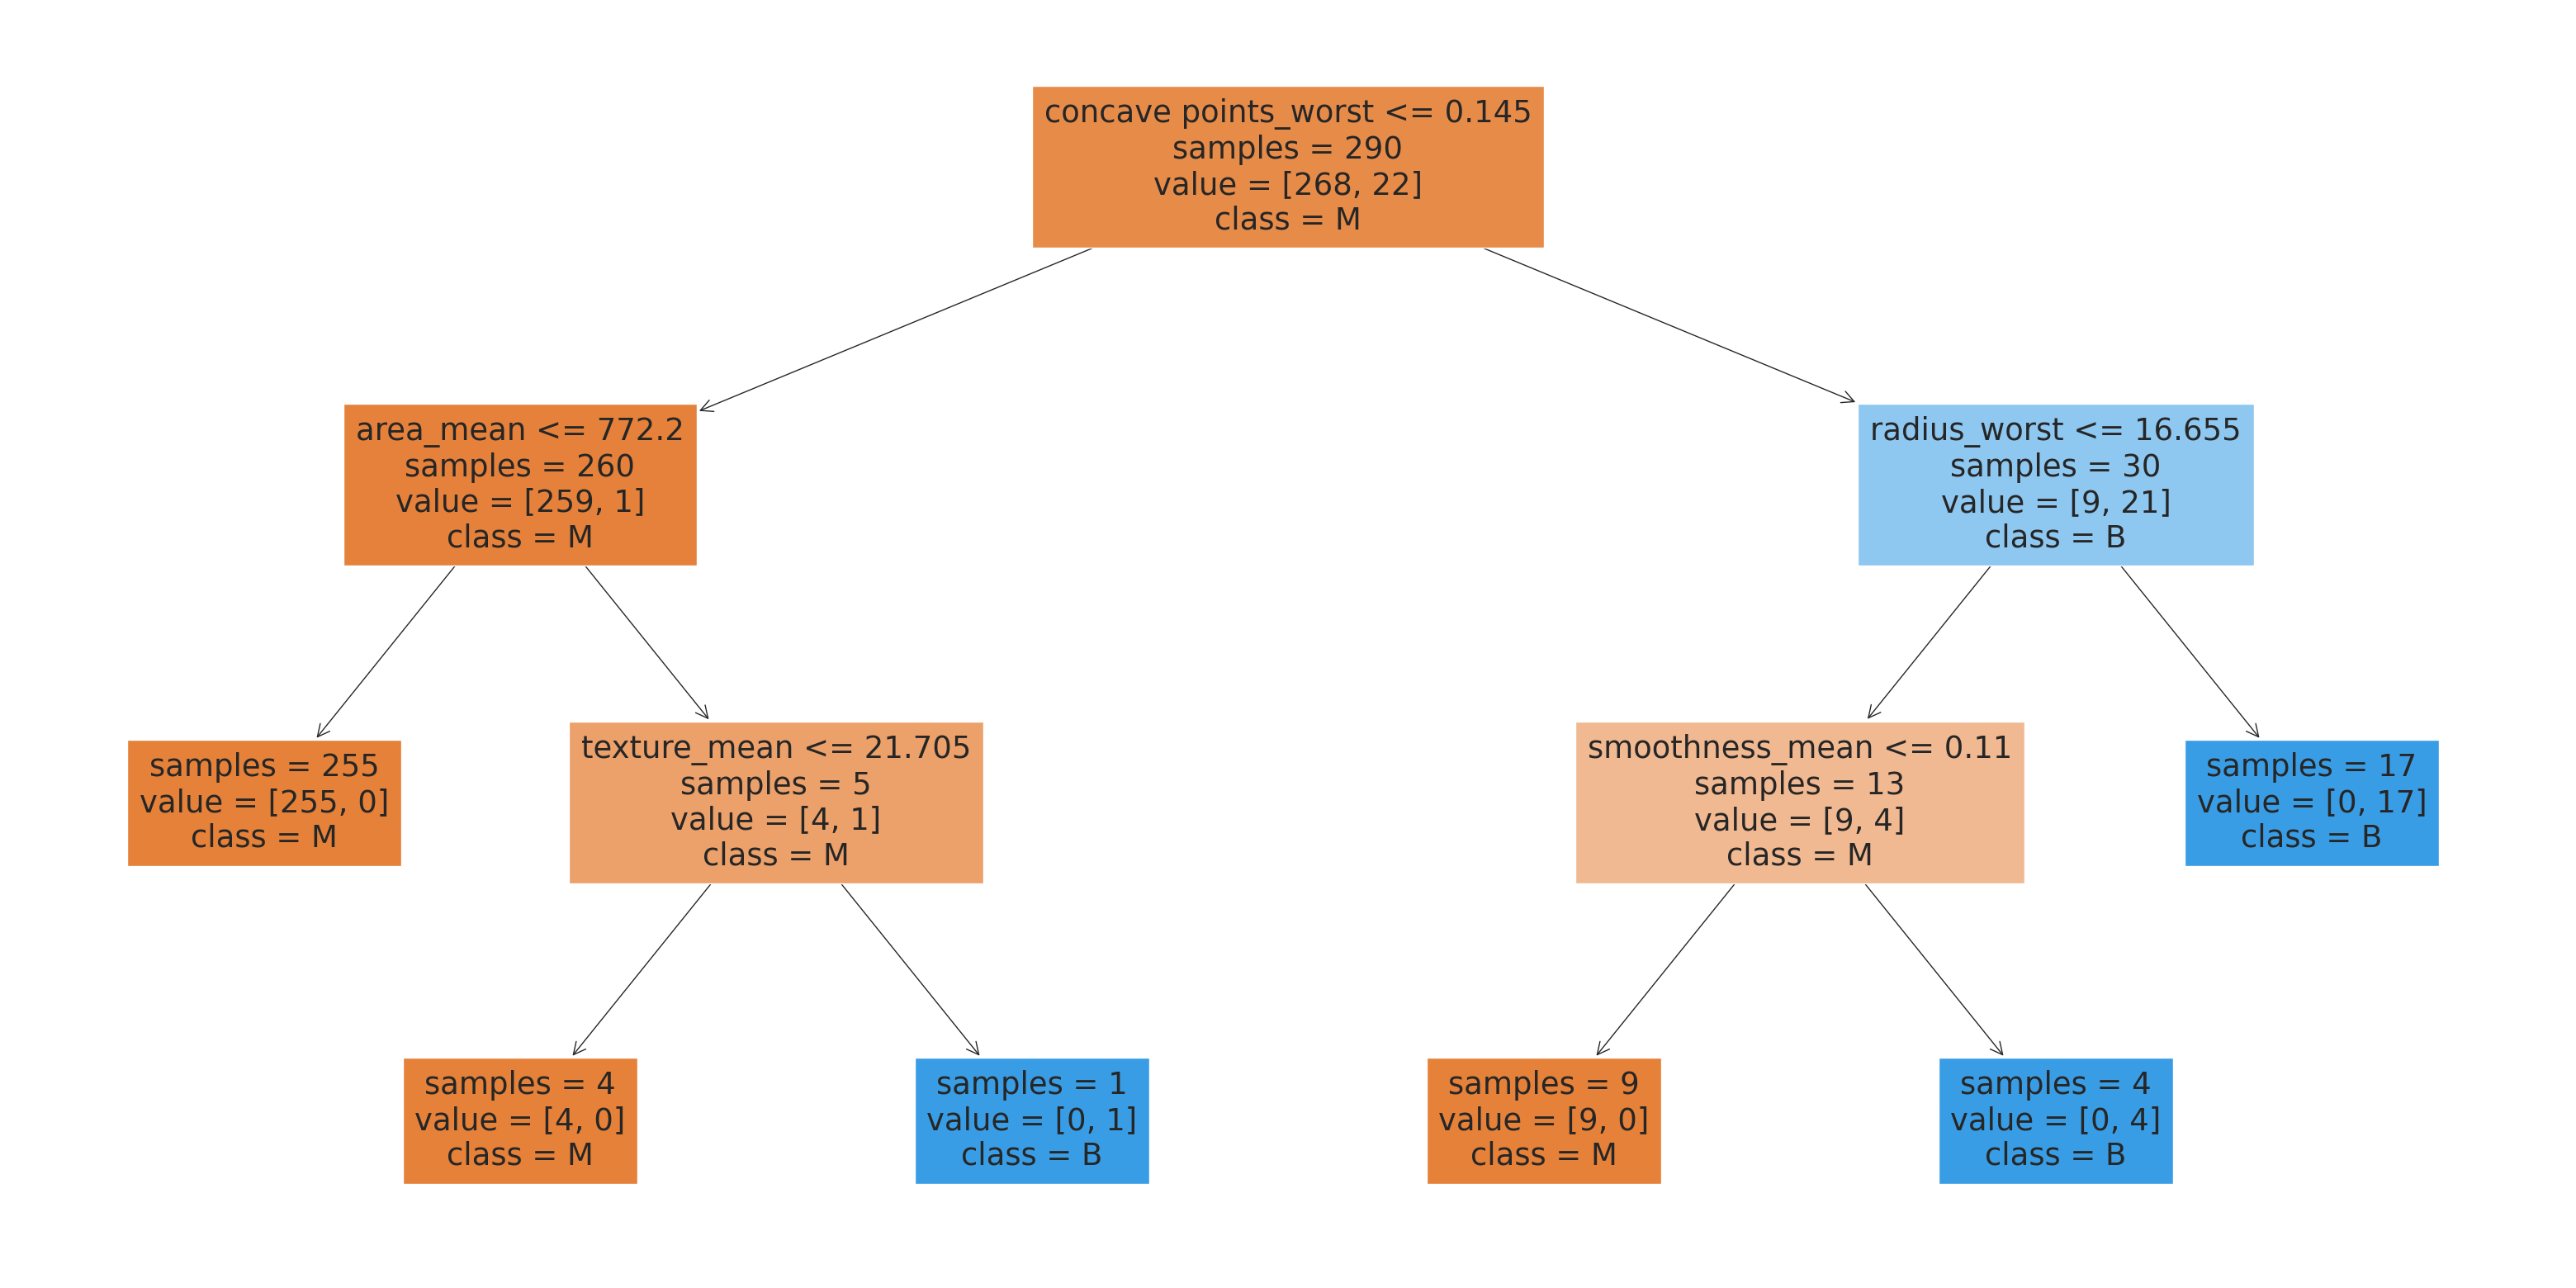

In [76]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(model_imbalanced, feature_names=list(X_imbalanced.columns.values),  class_names=['M','B'],filled=True,impurity = False)


In [77]:
model_imbalanced_gini=tree.DecisionTreeClassifier(criterion='gini', splitter='best',random_state=123)
model_imbalanced_gini.fit(X_train_imbalanced,Y_train_imbalanced)
predictions_imbalanced_gini=model_imbalanced_gini.predict(X_test_imbalanced)
print('Training set accuracy: {:.4f}'.format(model_imbalanced_gini.score(X_train_imbalanced, Y_train_imbalanced)*100))
print('Test set accuracy: {:.4f}'.format(model_imbalanced_gini.score(X_test_imbalanced, Y_test_imbalanced)*100))


Training set accuracy: 100.0000
Test set accuracy: 98.9691


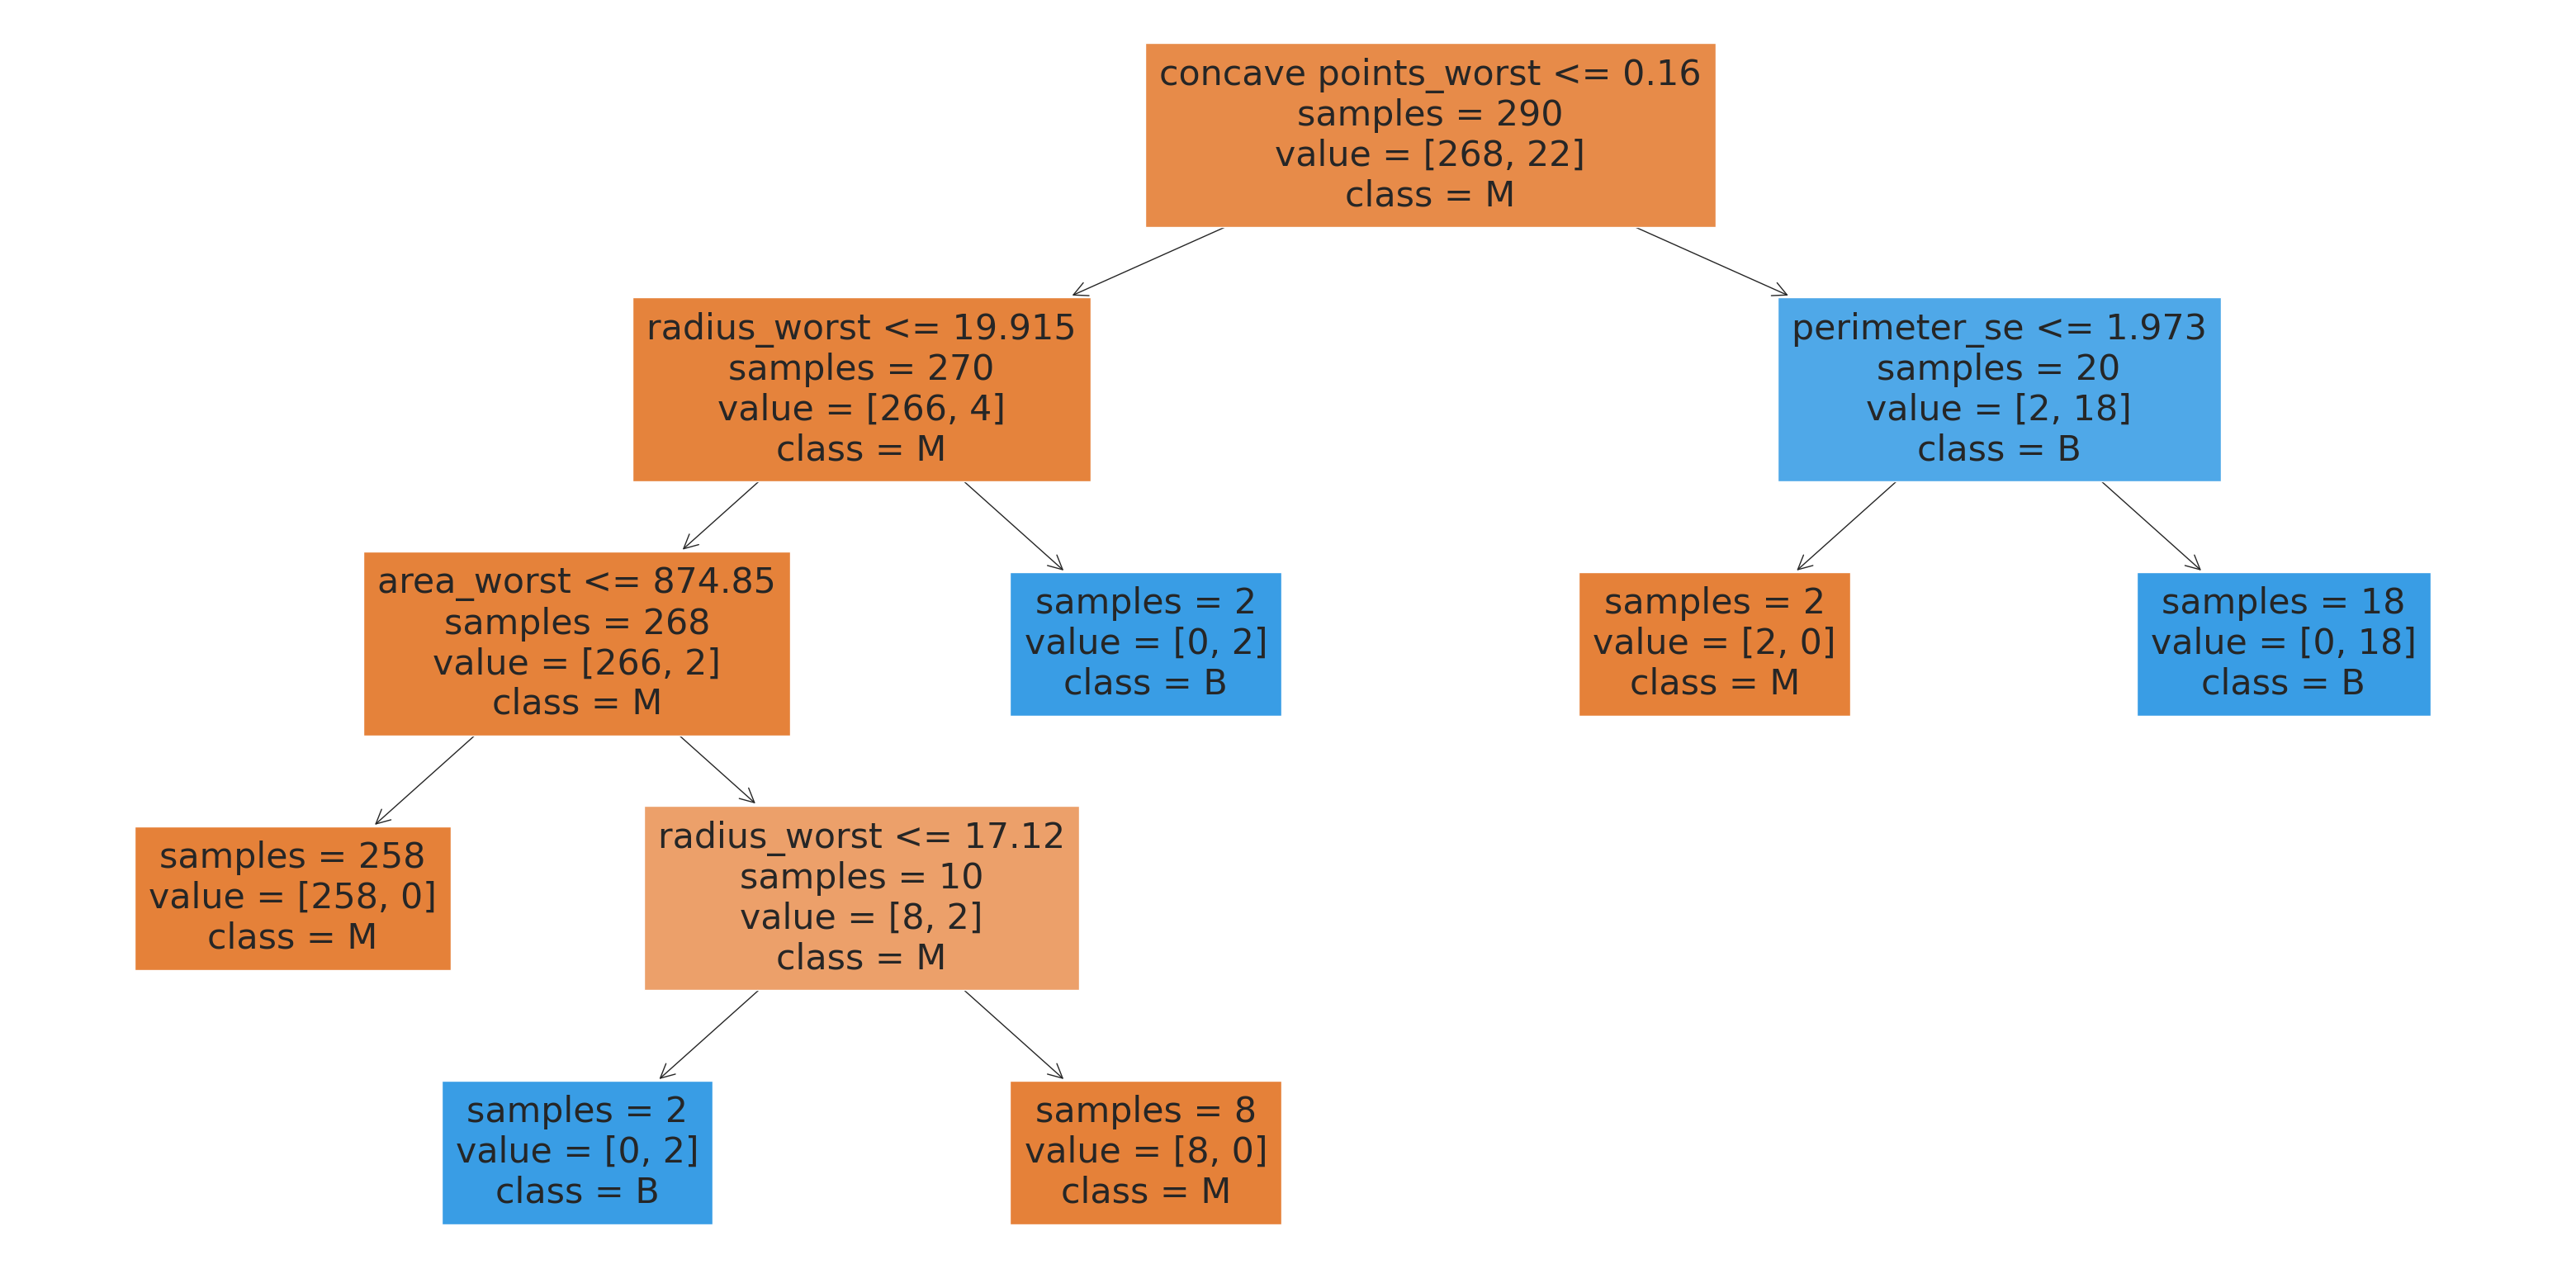

In [78]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(model_imbalanced_gini, feature_names=list(X_imbalanced.columns.values),  class_names=['M','B'],filled=True,impurity = False)

In [79]:
conf_matrix(predictions_imbalanced_gini,Y_test_imbalanced)

B  M
B  89  0
M   1  7

In [80]:
X_test_important.shape

(114, 11)

In [81]:
indexx = ['Base model(entropia)']
models_accuracy = pd.DataFrame({'Model': ['Base (entropy)','Base (gini)', 'Correlated features (entropy)', 'Correlated features (gini)', 
                                          'Important features (entropy)', 'Important features (gini)', 'Imbalanced (entropy)', 'Imbalanced (gini)'  ], 
                                ' Test accuracy': [model.score(X_test, Y_test)*100, model_gini.score(X_test, Y_test)*100, model_corr.score(X_test_corr,Y_test_corr)*100, 
                                             model_corr_gini.score(X_test_gini_corr, Y_test_gini_corr)*100,model_imp.score(X_test_important,Y_test_important)*100, 
                                                  model_imp_gini.score(X_test_important_gini,Y_test_important_gini)*100,model_imbalanced.score(X_test_imbalanced, Y_test_imbalanced)*100,
                                                  model_imbalanced_gini.score(X_test_imbalanced, Y_test_imbalanced)*100] })
models_accuracy

Model   Test accuracy
0                 Base (entropy)       96.491228
1                    Base (gini)       95.614035
2  Correlated features (entropy)       94.736842
3     Correlated features (gini)       92.982456
4   Important features (entropy)       95.614035
5      Important features (gini)       96.491228
6           Imbalanced (entropy)      100.000000
7              Imbalanced (gini)       98.969072